# Please download and install the following packages before proceeding:

# 1. pip install uszipcode
# 2. pip install folium
# 3. pip install memory_profiler

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import string
import random
from scipy import stats
import statsmodels.formula.api as sm
import os
import folium

from sklearn.cluster import KMeans
%load_ext memory_profiler
%matplotlib inline

## Read in the main data file
The encoding for the file is different and so we need to specify that while reading it in

In [2]:
# THIS CODE CELL IS TO CAPTURE THE START TIME OF OUR NOTEBOOK RUN
start_time = time.time()

In [3]:
crime = pd.read_csv('crime.csv', encoding = 'ISO-8859-1')

In [4]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"


In [5]:
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,303371.000000,303371.000000,303371.000000,303371.000000,284532.000000,284532.000000
mean,2317.163249,2016.486849,6.560558,13.117022,42.221680,-70.920017
std,1185.104161,0.965629,3.344305,6.295137,2.085899,3.374111
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297521,-71.097131
50%,2907.000000,2016.000000,7.000000,14.000000,42.325538,-71.077497
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062492
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [6]:
print(crime.count())

INCIDENT_NUMBER        303371
OFFENSE_CODE           303371
OFFENSE_CODE_GROUP     303371
OFFENSE_DESCRIPTION    303371
DISTRICT               301728
REPORTING_AREA         303371
SHOOTING                  969
OCCURRED_ON_DATE       303371
YEAR                   303371
MONTH                  303371
DAY_OF_WEEK            303371
HOUR                   303371
UCR_PART               303281
STREET                 292753
Lat                    284532
Long                   284532
Location               303371
dtype: int64


In [7]:
crime.describe(include='all')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,303371,303371.000000,303371,303371,301728,303371,969,303371,303371.000000,303371.000000,303371,303371.000000,303281,292753,284532.000000,284532.000000,303371
unique,268724,NaN,67,243,12,879,1,222011,NaN,NaN,7,NaN,4,4595,NaN,NaN,17999
top,I162030584,NaN,Motor Vehicle Accident Response,INVESTIGATE PERSON,B2,,Y,2017-06-01 00:00:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,13,NaN,35342,17871,47770,19130,969,29,NaN,NaN,46059,NaN,150513,13504,NaN,NaN,18839
mean,NaN,2317.163249,NaN,NaN,NaN,NaN,NaN,NaN,2016.486849,6.560558,NaN,13.117022,NaN,NaN,42.221680,-70.920017,NaN
std,NaN,1185.104161,NaN,NaN,NaN,NaN,NaN,NaN,0.965629,3.344305,NaN,6.295137,NaN,NaN,2.085899,3.374111,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-71.178674,NaN
25%,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,4.000000,NaN,9.000000,NaN,NaN,42.297521,-71.097131,NaN
50%,NaN,2907.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,7.000000,NaN,14.000000,NaN,NaN,42.325538,-71.077497,NaN
75%,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,9.000000,NaN,18.000000,NaN,NaN,42.348624,-71.062492,NaN


## Drop the rows where we are missing Latitude, Longitude information

We will drop the rows where we are missing lat, long information for the records (There are about 28k such records)

In [8]:
crime_subset = crime[(crime['Lat']!=-1) & (crime['Lat'].notnull())]

### crime_subset only contains records with latitudes and longitudes
- We will be using this subset of the data going forward

In [9]:
print(crime_subset.shape)
crime_subset.head()

(283871, 17)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)"
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)"
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)"
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)"
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)"


## Load the library (uszipcodes) to map the latitude, longitudes to the zips
- To merge the dataset with the zip attributes, we would need to pull up the zips for each lat long present in the data file
- We create a unique values of latitude, longitude and pull up the zip for each set of lat, longs
- After pulling up the zips for each lat-long, we merge it back with the original dataset


In [10]:
from uszipcode import ZipcodeSearchEngine

In [11]:
search = ZipcodeSearchEngine()

### Using the lat, long coordinates the library gives us the zip that it belongs to
Example for a random pair of lat, long gives us the zip for that lat long

In [12]:
search.by_coordinate(42.362539, -71.165069, radius=2, returns=1)

[{"City": "Watertown", "Density": 7943.920595533498, "HouseOfUnits": 15622, "LandArea": 4.03, "Latitude": 42.3653524, "Longitude": -71.1843543, "NEBoundLatitude": 42.38631710000001, "NEBoundLongitude": -71.1378801, "Population": 32014, "SWBoundLatitude": 42.358731, "SWBoungLongitude": -71.21740199999998, "State": "MA", "TotalWages": 892807332.0, "WaterArea": 0.12, "Wealthy": 27888.028112700693, "Zipcode": "02472", "ZipcodeType": "Standard"}]

### We take the unique values of latitude, longitudes to get the zip for each of them
- df_lat_long is the list of unique values for each of the 

In [13]:
df_lat_long = crime_subset.loc[:,['Lat','Long']].drop_duplicates()

## The function below gives us a dictionary of zip and its demographic information through lat, long
- We apply this function to each row of the unique lat, long dataset
- We then append this new column of dicts of zip information to our unique lat long dataframe

In [14]:
def get_demographics(lat_long):
    return search.by_coordinate(lat_long.Lat, lat_long.Long, radius=3, returns=1)

## CODE OPTIMIZATION:
- Initially the apply function was being run for the entire main dataset with 300k rows
- This was a bottleneck for us and initially it was taking us 15 minutes just to run the code below
- To optimize this step, we created a new dataframe of unique lat, longs and ran the apply function only for that
- This reduced the run time to 16 seconds

In [15]:
#res = %timeit -o 
df_lat_long['zip_dict'] = df_lat_long.loc[:,['Lat','Long']].apply(get_demographics, axis=1)

In [16]:
df_lat_long.head()

,Lat,Long,zip_dict
0,42.282829,-71.091825,"[{\n ""City"": ""Mattapan"",\n ""Density"": 12..."
1,42.266525,-71.098553,"[{\n ""City"": ""Mattapan"",\n ""Density"": 12..."
2,42.322496,-71.069092,"[{\n ""City"": ""Dorchester"",\n ""Density"": ..."
3,42.262539,-71.165069,"[{\n ""City"": ""West Roxbury"",\n ""Density""..."
4,42.338964,-71.048964,"[{\n ""City"": ""Boston"",\n ""Density"": 1574..."


## Extract the zip code from the dictionary of information for each row

In [17]:
df_lat_long = df_lat_long.assign(zip_code = df_lat_long.loc[:,['zip_dict']].apply(lambda x:[y[0].Zipcode for y in x]))

In [18]:
df_lat_long.head()

,Lat,Long,zip_dict,zip_code
0,42.282829,-71.091825,"[{\n ""City"": ""Mattapan"",\n ""Density"": 12...",02126
1,42.266525,-71.098553,"[{\n ""City"": ""Mattapan"",\n ""Density"": 12...",02126
2,42.322496,-71.069092,"[{\n ""City"": ""Dorchester"",\n ""Density"": ...",02125
3,42.262539,-71.165069,"[{\n ""City"": ""West Roxbury"",\n ""Density""...",02132
4,42.338964,-71.048964,"[{\n ""City"": ""Boston"",\n ""Density"": 1574...",02127


### df_crime will be the main dataset which has the zips going forward

In [19]:
df_crime = pd.merge(crime_subset, df_lat_long, how='left', on=['Lat', 'Long'], left_index=False, right_index=False)

### Verify whether the number of rows is the same in the merged dataset and the original one

In [20]:
df_crime.shape[0] == crime_subset.shape[0]

True

In [21]:
# df_crime.to_csv('crimes_with_locations.csv', index_label=False)

### Inspect that the zip column has been pulled into our original dataframe

In [22]:
df_crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,zip_dict,zip_code
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,Tuesday,20,Part Three,BLUE HILL AVE,42.282829,-71.091825,"(42.28282878, -71.09182490)","[{\n ""City"": ""Mattapan"",\n ""Density"": 12...",02126
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,Tuesday,21,Part Three,ROCKDALE ST,42.266525,-71.098553,"(42.26652466, -71.09855320)","[{\n ""City"": ""Mattapan"",\n ""Density"": 12...",02126
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,Tuesday,21,Part One,BATCHELDER ST,42.322496,-71.069092,"(42.32249601, -71.06909180)","[{\n ""City"": ""Dorchester"",\n ""Density"": ...",02125
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,Tuesday,18,Part One,VOGEL ST,42.262539,-71.165069,"(42.26253888, -71.16506913)","[{\n ""City"": ""West Roxbury"",\n ""Density""...",02132
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,Tuesday,20,Part Three,W THIRD ST,42.338964,-71.048964,"(42.33896439, -71.04896420)","[{\n ""City"": ""Boston"",\n ""Density"": 1574...",02127


# Load the zip demographic information

In [23]:
zip_demographics = pd.read_csv('zip_attributes.csv', dtype={'zip_code':np.object})
zip_demographics.head()

,zip_code,population,male_population,households_per_zip,avg_house_value,income_per_household,median_age,no_of_business,land_area,asian_population,black_population,hawaiian_population,indian_population,other_population,white_population,business_first_quater_payroll,delivery_total,delivery_business,delivery_residential,persons_per_household
0,02126,25562,11547,9368,306200,47902,36.7,199,2.082,297,22235,110,387,1729,1846,14040,9491,330,7987,2.71
1,02125,33295,16399,12151,357800,49683,30.9,449,2.133,3969,11618,242,396,7091,12292,119576,13748,511,12228,2.70
2,02132,25861,12043,10891,444000,91273,43.9,499,4.561,1862,1639,28,146,688,22075,52062,12680,489,11306,2.32
3,02127,31799,14935,15191,469800,85336,32.0,640,2.020,1687,2290,50,173,1744,26588,143962,17504,857,16258,2.06
4,02118,26498,14218,12314,681400,59589,34.0,773,1.101,3911,6065,46,243,2344,14865,214423,14088,1054,12676,1.92


In [24]:
crime_classes = pd.read_csv('crime_classification.csv')
crime_classes.head()

,OFFENSE_DESCRIPTION,crime_class,severity_index
0,VERBAL DISPUTE,Part Three,MEDIUM
1,INVESTIGATE PROPERTY,Part Three,MEDIUM
2,LARCENY ALL OTHERS,Part One - Property,VERY HIGH
3,LARCENY THEFT FROM BUILDING,Part One - Property,VERY HIGH
4,TOWED MOTOR VEHICLE,Part Three,MEDIUM


In [25]:
df_crime_temp = df_crime.merge(zip_demographics, how='left', on='zip_code', left_index=False, right_index=False)
df_crime = df_crime_temp.merge(crime_classes, how='left', on='OFFENSE_DESCRIPTION', 
                                             left_index=False, right_index=False)

In [26]:
df_crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location', 'zip_dict', 'zip_code',
       'population', 'male_population', 'households_per_zip',
       'avg_house_value', 'income_per_household', 'median_age',
       'no_of_business', 'land_area', 'asian_population', 'black_population',
       'hawaiian_population', 'indian_population', 'other_population',
       'white_population', 'business_first_quater_payroll', 'delivery_total',
       'delivery_business', 'delivery_residential', 'persons_per_household',
       'crime_class', 'severity_index'],
      dtype='object')

In [27]:
df_crime.shape

(283871, 40)

In [28]:
grouped_zipcode = df_crime.groupby(['zip_code'])
demo_stats = grouped_zipcode.agg({'zip_code':'count','no_of_business':'max', 'median_age':'max', 'income_per_household':'max', 
                                  'business_first_quater_payroll':'max', 'avg_house_value':'max',
                                  'black_population':'max', 'white_population':'max'
                                 })
demo_stats.rename(columns={'zip_code':'num_of_crime_incidents'}, inplace=True)
demo_stats.head()

,num_of_crime_incidents,no_of_business,median_age,income_per_household,business_first_quater_payroll,avg_house_value,black_population,white_population
zip_code,,,,,,,,
02026,253,881,43.4,87108,160678,394200,1490,22202
02108,6601,1141,37.2,115042,554272,924000,116,3537
02109,6134,1308,35.9,117344,1816946,779800,139,3361
02110,1374,1766,52.5,120800,1975350,794700,54,1564
02111,12084,901,34.2,39670,781692,667600,306,3426


## Exploring the analysis between crime incidence and the demographic information
### Double-click the scatter-plots to zoom in

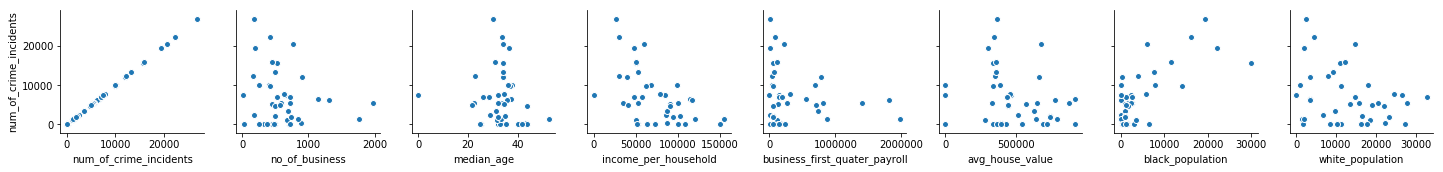

In [29]:
y_vars=['num_of_crime_incidents']

sns.pairplot(demo_stats, x_vars=demo_stats.columns, y_vars=y_vars)

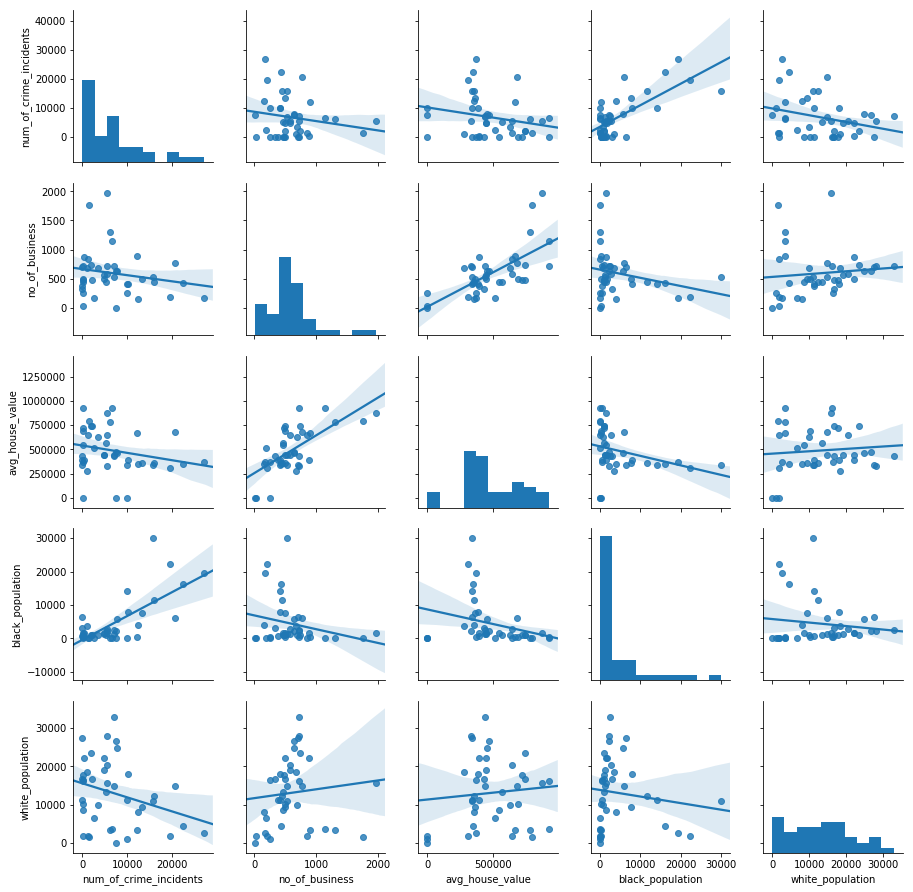

In [30]:
sns.pairplot(demo_stats, kind="reg", vars=['num_of_crime_incidents', 'no_of_business', 'avg_house_value', 'black_population', 'white_population'])

## Exploring the crime variation with time information

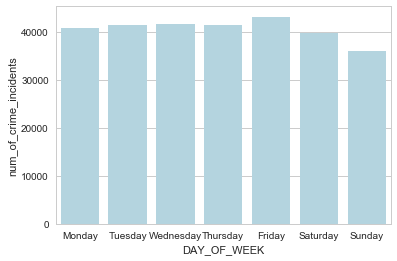

In [31]:
grouped_vars = df_crime.groupby(['DAY_OF_WEEK'])
grouped_stats = grouped_vars.agg({'zip_code':'count'})
grouped_stats.rename(columns={'zip_code':'num_of_crime_incidents'}, inplace=True)
grouped_stats= grouped_stats.reset_index()

sns.set(style="whitegrid")
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x="DAY_OF_WEEK", y="num_of_crime_incidents", order=day_of_week_order, data=grouped_stats, color='lightblue')

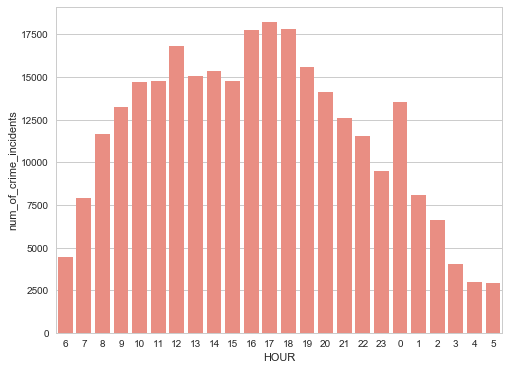

In [32]:
grouped_vars = df_crime.groupby(['HOUR'])
grouped_stats = grouped_vars.agg({'zip_code':'count'})
grouped_stats.rename(columns={'zip_code':'num_of_crime_incidents'}, inplace=True)
grouped_stats= grouped_stats.reset_index()

dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)

hours_ranking = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5]
sns.barplot(ax=ax, x="HOUR", y="num_of_crime_incidents", color='salmon', order=hours_ranking, data=grouped_stats)

## Exploring the crime variation with zips

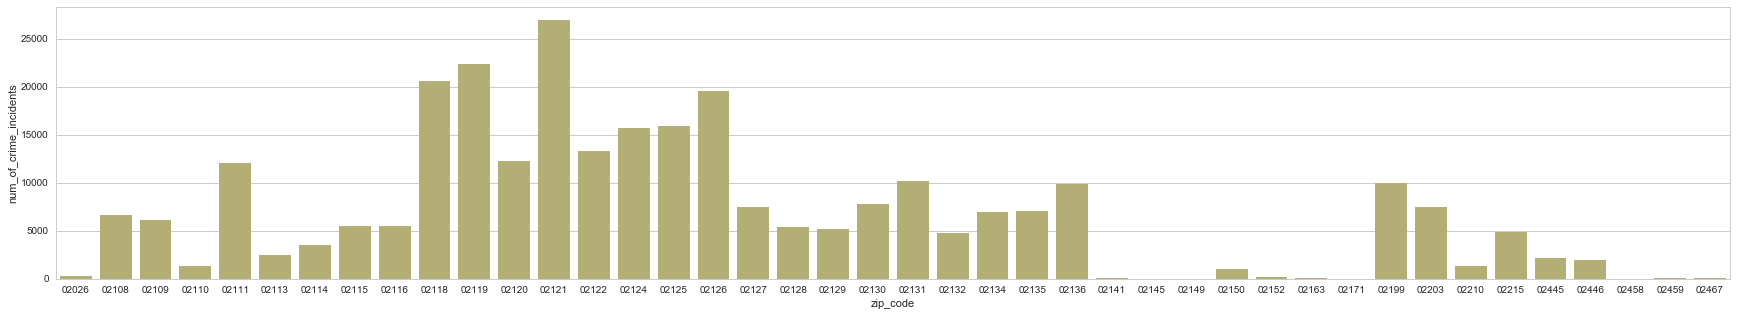

In [33]:
grouped_vars = df_crime.groupby(['zip_code'])
grouped_stats = grouped_vars.agg({'zip_code':'count'})
grouped_stats.rename(columns={'zip_code':'num_of_crime_incidents'}, inplace=True)
grouped_stats= grouped_stats.reset_index()

dims = (30, 5)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(ax=ax, x="zip_code", y="num_of_crime_incidents", color='darkkhaki', data=grouped_stats)

# Regression Analysis:
- We see that crime varies over DAY_OF_WEEK, HOUR, and ZIP_CODE during exploratory analysis
- We will run a regression analysis using these 3 factors

### Results:
- Using these 3 variables as categorical variables in the equation, we see that we can explain __~82% of the variation in crime__
- This is __because the zip captures a lot of the demographic__ informatin within itself

In [34]:
import statsmodels.formula.api as smf

In [35]:
grouped_vars = df_crime.groupby(['zip_code', 'HOUR', 'DAY_OF_WEEK'])
grouped_stats = grouped_vars.agg({'zip_code':'count'})
grouped_stats.rename(columns={'zip_code':'num_of_crime_incidents'}, inplace=True)
grouped_stats= grouped_stats.reset_index()

res_1 = smf.ols(formula='num_of_crime_incidents ~ C(DAY_OF_WEEK) + C(HOUR) + C(zip_code)', data=grouped_stats).fit()
print(res_1.summary())

                              OLS Regression Results                              
Dep. Variable:     num_of_crime_incidents   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.815
Method:                     Least Squares   F-statistic:                     366.5
Date:                    Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                            11:56:41   Log-Likelihood:                -25943.
No. Observations:                    5815   AIC:                         5.203e+04
Df Residuals:                        5744   BIC:                         5.250e+04
Df Model:                              70                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [36]:
#this is done to merge the codes
crimes = df_crime

In [37]:
#this is done to merge the codes
attributes = zip_demographics
attributes.population = attributes.population.replace(0,np.nan)
attributes = attributes.dropna(subset=['population'])

In [38]:
crimes.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,indian_population,other_population,white_population,business_first_quater_payroll,delivery_total,delivery_business,delivery_residential,persons_per_household,crime_class,severity_index
0,I182054381,3301,Verbal Disputes,VERBAL DISPUTE,B3,428,NaN,2018-07-10 20:57:00,2018,7,...,387,1729,1846,14040,9491,330,7987,2.71,Part Three,MEDIUM
1,I182054379,3114,Investigate Property,INVESTIGATE PROPERTY,E18,481,NaN,2018-07-10 21:16:00,2018,7,...,387,1729,1846,14040,9491,330,7987,2.71,Part Three,MEDIUM
2,I182054378,619,Larceny,LARCENY ALL OTHERS,B2,182,NaN,2018-07-10 21:27:00,2018,7,...,396,7091,12292,119576,13748,511,12228,2.70,Part One - Property,VERY HIGH
3,I182054376,617,Larceny,LARCENY THEFT FROM BUILDING,E5,714,NaN,2018-07-10 18:39:00,2018,7,...,146,688,22075,52062,12680,489,11306,2.32,Part One - Property,VERY HIGH
4,I182054374,3410,Towed,TOWED MOTOR VEHICLE,C6,211,NaN,2018-07-10 20:11:00,2018,7,...,173,1744,26588,143962,17504,857,16258,2.06,Part Three,MEDIUM
5,I182054372,3201,Property Lost,PROPERTY - LOST,C6,186,NaN,2018-07-10 21:08:00,2018,7,...,243,2344,14865,214423,14088,1054,12676,1.92,Part Three,MEDIUM
6,I182054371,2647,Other,THREATS TO DO BODILY HARM,B3,427,NaN,2018-07-10 19:42:00,2018,7,...,387,1729,1846,14040,9491,330,7987,2.71,Part Two,HIGH
7,I182054369,3115,Investigate Person,INVESTIGATE PERSON,D14,788,NaN,2018-07-10 20:17:00,2018,7,...,243,2225,32791,186990,21991,792,20752,2.10,Part Three,MEDIUM
8,I182054368,3115,Investigate Person,INVESTIGATE PERSON,E13,571,NaN,2018-07-10 20:06:00,2018,7,...,512,3980,24659,309393,17103,741,15422,2.23,Part Three,MEDIUM
9,I182054366,613,Larceny,LARCENY SHOPLIFTING,C11,450,NaN,2018-07-10 20:28:00,2018,7,...,718,5186,11036,47983,18652,789,17233,2.72,Part One - Property,VERY HIGH


In [39]:
zipcrime = crimes.groupby(by=['zip_code','HOUR','DAY_OF_WEEK']).agg({'INCIDENT_NUMBER':'count'}) #grouping the data by zip_code,hour and day of week
zipcrime = zipcrime.reset_index()
data = zipcrime.merge(attributes, how='left', left_on = zipcrime.zip_code, right_on=attributes.zip_code)
data = data.dropna(subset=['population']) #removing the rows which have zero population
data = data.drop(columns=[ 'zip_code_x', 'zip_code_y'])
print(len(data))
print(data.columns)

5647
Index(['key_0', 'HOUR', 'DAY_OF_WEEK', 'INCIDENT_NUMBER', 'population',
       'male_population', 'households_per_zip', 'avg_house_value',
       'income_per_household', 'median_age', 'no_of_business', 'land_area',
       'asian_population', 'black_population', 'hawaiian_population',
       'indian_population', 'other_population', 'white_population',
       'business_first_quater_payroll', 'delivery_total', 'delivery_business',
       'delivery_residential', 'persons_per_household'],
      dtype='object')


In [40]:
data.head()

,key_0,HOUR,DAY_OF_WEEK,INCIDENT_NUMBER,population,male_population,households_per_zip,avg_house_value,income_per_household,median_age,...,black_population,hawaiian_population,indian_population,other_population,white_population,business_first_quater_payroll,delivery_total,delivery_business,delivery_residential,persons_per_household
0,02026,0,Friday,2,24711.0,11950.0,9644.0,394200.0,87108.0,43.4,...,1490.0,21.0,135.0,507.0,22202.0,160678.0,11398.0,981.0,10118.0,2.45
1,02026,0,Monday,2,24711.0,11950.0,9644.0,394200.0,87108.0,43.4,...,1490.0,21.0,135.0,507.0,22202.0,160678.0,11398.0,981.0,10118.0,2.45
2,02026,0,Saturday,4,24711.0,11950.0,9644.0,394200.0,87108.0,43.4,...,1490.0,21.0,135.0,507.0,22202.0,160678.0,11398.0,981.0,10118.0,2.45
3,02026,0,Sunday,3,24711.0,11950.0,9644.0,394200.0,87108.0,43.4,...,1490.0,21.0,135.0,507.0,22202.0,160678.0,11398.0,981.0,10118.0,2.45
4,02026,0,Thursday,4,24711.0,11950.0,9644.0,394200.0,87108.0,43.4,...,1490.0,21.0,135.0,507.0,22202.0,160678.0,11398.0,981.0,10118.0,2.45


# Removing the variables based on economic significance and statistical significance. Running the linear regression to understand the correlations and probable causal relationship among attributes and CRIME_INCIDENCE

Following parameters were removed based on economic signinficance:
1. population: Since race wise population breakup is used, using this paramters will create multi-colineararity
2. delievery_total: the number of households which have a mail box. Since number of households are taken this variable is trivial.

Following parameters were statiscally insignificant:
3. business_first_quater_payroll
4. No_of_business
5. Median Age
6. Persons_per_household

In [41]:
reg_data = data #creating suitable dataset for running the regression
reg_data = reg_data.drop(columns=['no_of_business','median_age','population','delivery_total','delivery_business','delivery_residential',
                                  'land_area','avg_house_value','business_first_quater_payroll','persons_per_household'])
reg_data.head()

,key_0,HOUR,DAY_OF_WEEK,INCIDENT_NUMBER,male_population,households_per_zip,income_per_household,asian_population,black_population,hawaiian_population,indian_population,other_population,white_population
0,02026,0,Friday,2,11950.0,9644.0,87108.0,803.0,1490.0,21.0,135.0,507.0,22202.0
1,02026,0,Monday,2,11950.0,9644.0,87108.0,803.0,1490.0,21.0,135.0,507.0,22202.0
2,02026,0,Saturday,4,11950.0,9644.0,87108.0,803.0,1490.0,21.0,135.0,507.0,22202.0
3,02026,0,Sunday,3,11950.0,9644.0,87108.0,803.0,1490.0,21.0,135.0,507.0,22202.0
4,02026,0,Thursday,4,11950.0,9644.0,87108.0,803.0,1490.0,21.0,135.0,507.0,22202.0


In [42]:
#running the linear regression
result = sm.ols(formula="INCIDENT_NUMBER ~ C(HOUR)+DAY_OF_WEEK+male_population+households_per_zip+income_per_household+asian_population+black_population+hawaiian_population+indian_population+other_population+white_population", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        INCIDENT_NUMBER   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     276.8
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:56:41   Log-Likelihood:                -27069.
No. Observations:                5647   AIC:                         5.422e+04
Df Residuals:                    5608   BIC:                         5.447e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Clustering Algorithm

The statisically significant variables from the above regression model were taken to analyse the number of cluster present among the zip codes. Elbow graph showed that optimum number of clusters are 3. The clustering also supports the results from regression that the crime incidence is positively correlated with number of households, hawaiian population, indian population and negatively correlated with income per household, white population and black population

In [43]:
zipcrime = crimes.groupby(by=['zip_code']).agg({'INCIDENT_NUMBER':'count'})
zipcrime = zipcrime.reset_index()
data = zipcrime.merge(attributes, how='left', left_on = zipcrime.zip_code, right_on=attributes.zip_code)
data = data.dropna(subset=['population'])
data = data.drop(columns=['zip_code_y','delivery_total',
                        'delivery_business','delivery_residential','land_area','avg_house_value',
                        'business_first_quater_payroll','persons_per_household','no_of_business','median_age'])
c_data = data.drop(columns=['zip_code_x','INCIDENT_NUMBER','population'])
data.head()

,key_0,zip_code_x,INCIDENT_NUMBER,population,male_population,households_per_zip,income_per_household,asian_population,black_population,hawaiian_population,indian_population,other_population,white_population
0,02026,02026,253,24711.0,11950.0,9644.0,87108.0,803.0,1490.0,21.0,135.0,507.0,22202.0
1,02108,02108,6601,3825.0,1921.0,1875.0,115042.0,169.0,116.0,0.0,15.0,45.0,3537.0
2,02109,02109,6134,3771.0,1951.0,2028.0,117344.0,250.0,139.0,2.0,19.0,57.0,3361.0
3,02110,02110,1374,1733.0,895.0,1048.0,120800.0,108.0,54.0,5.0,11.0,29.0,1564.0
4,02111,02111,12084,7383.0,3767.0,3301.0,39670.0,3685.0,306.0,6.0,20.0,114.0,3426.0


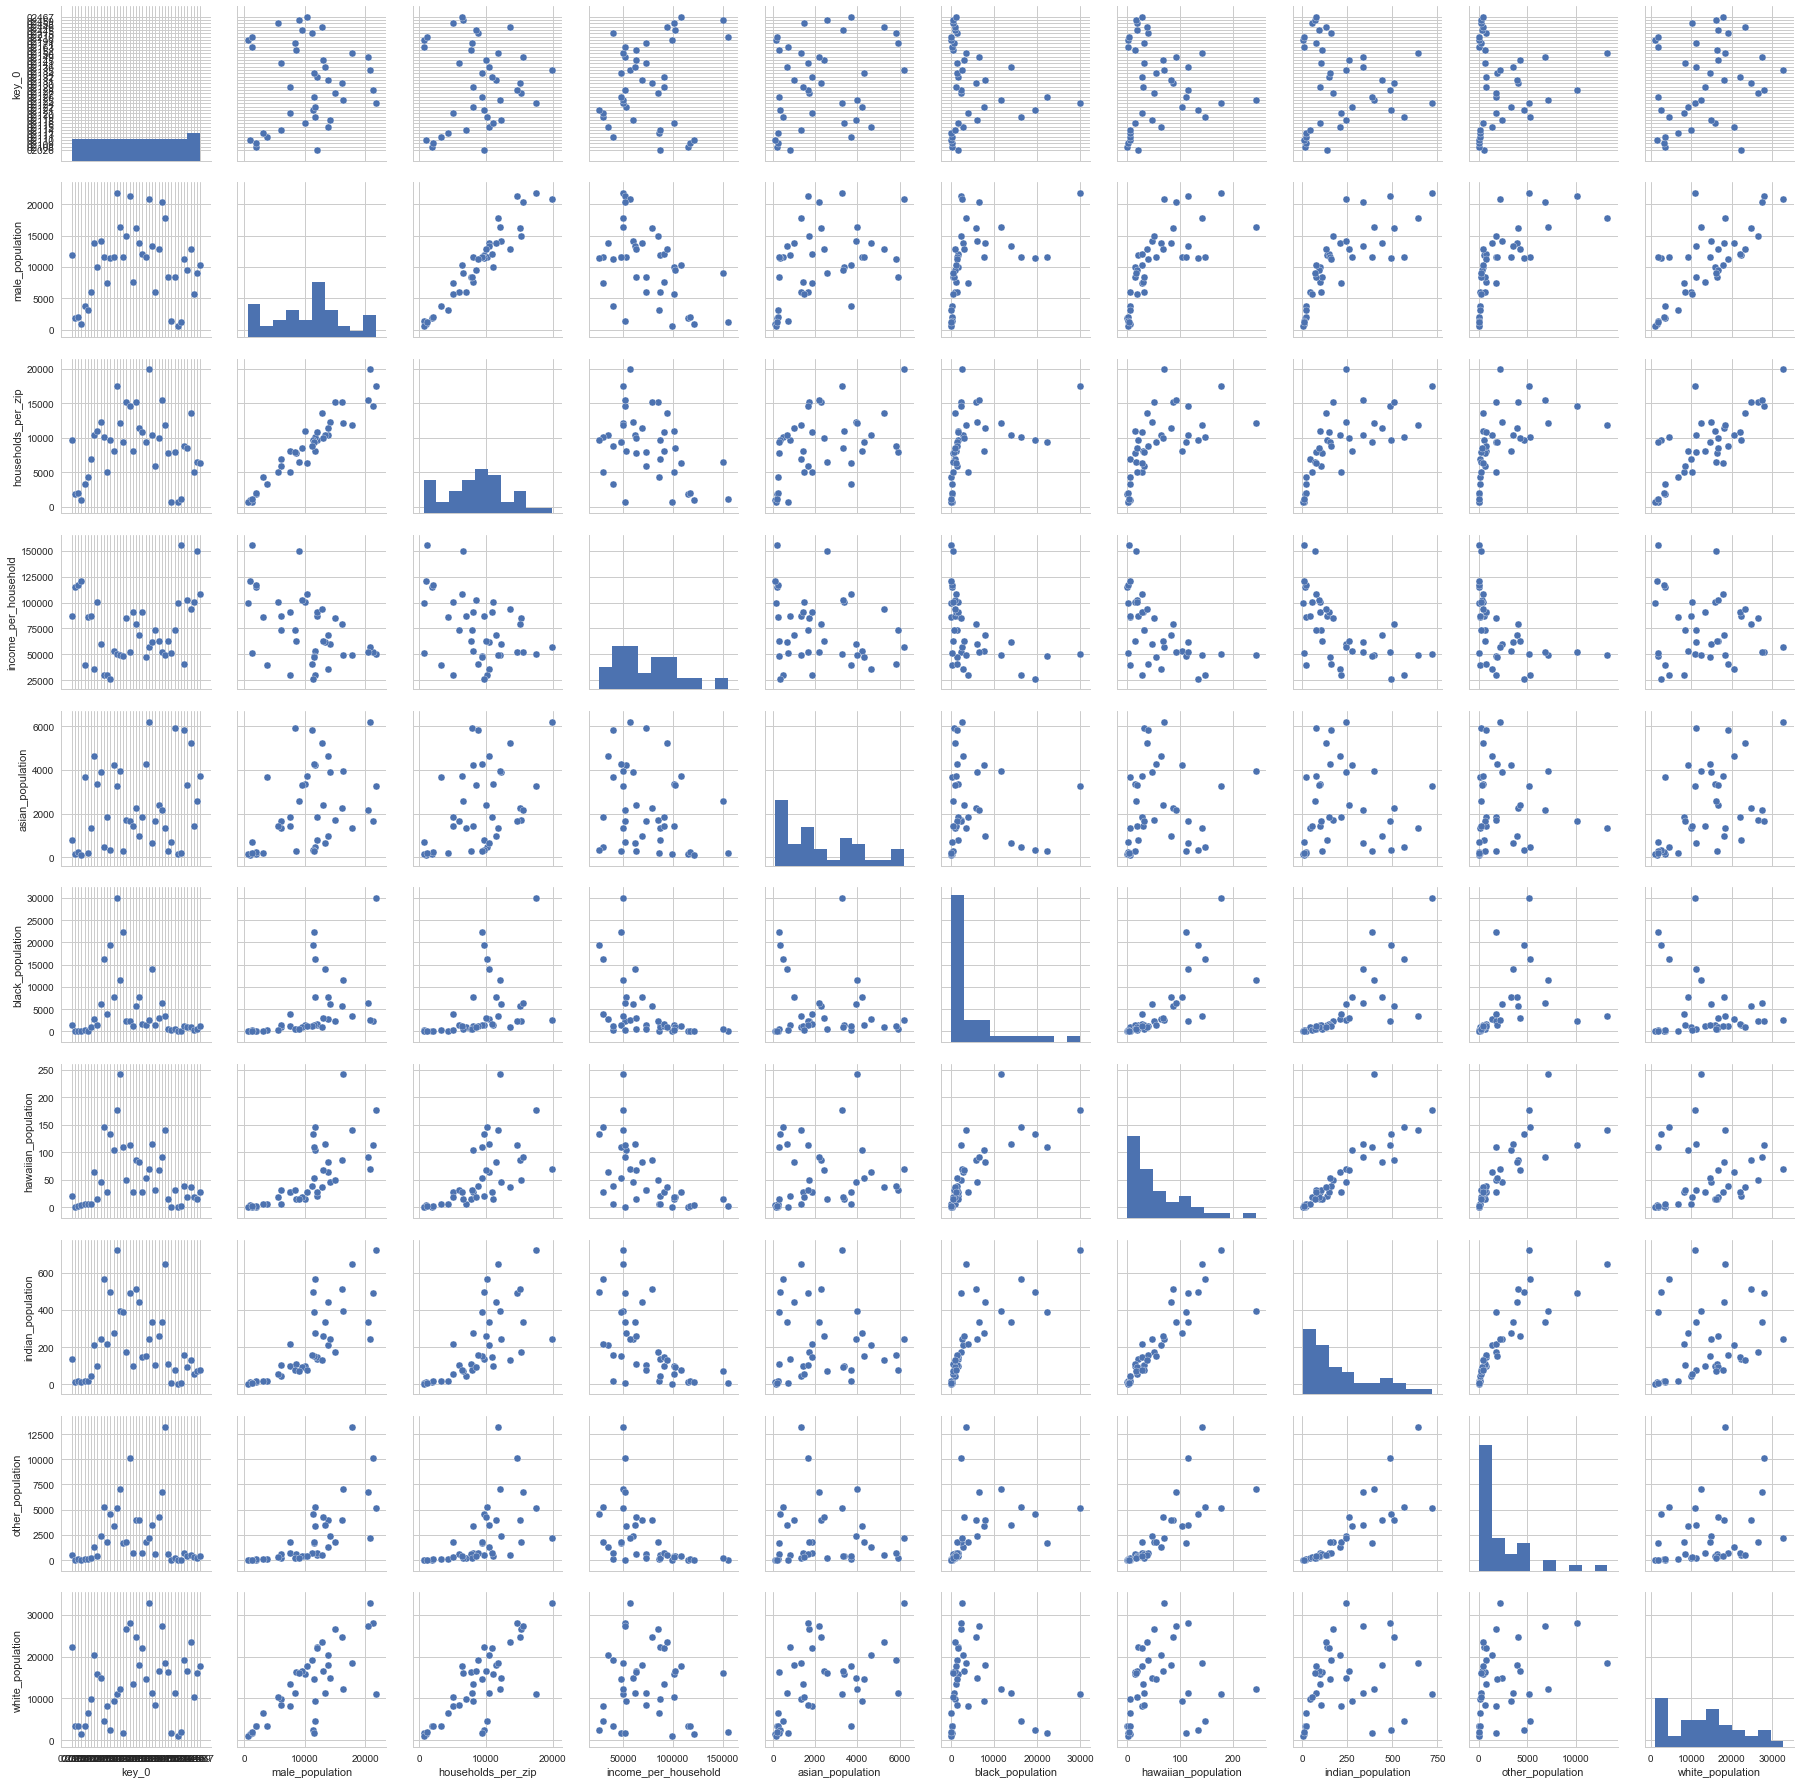

In [44]:
sns.pairplot(c_data)

In [45]:
rel_cols = list(c_data.columns)
nClusters=range(2,11)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(c_data[rel_cols])
    sumDistances.append(kmeans.inertia_) #Proxy for SSE

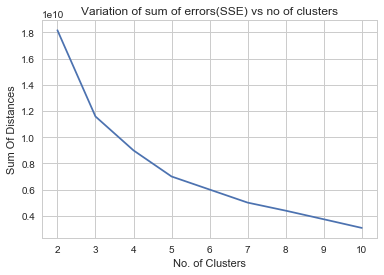

In [46]:
plt.plot(nClusters,sumDistances,'-')
plt.title('Variation of sum of errors(SSE) vs no of clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Sum Of Distances')
plt.show()

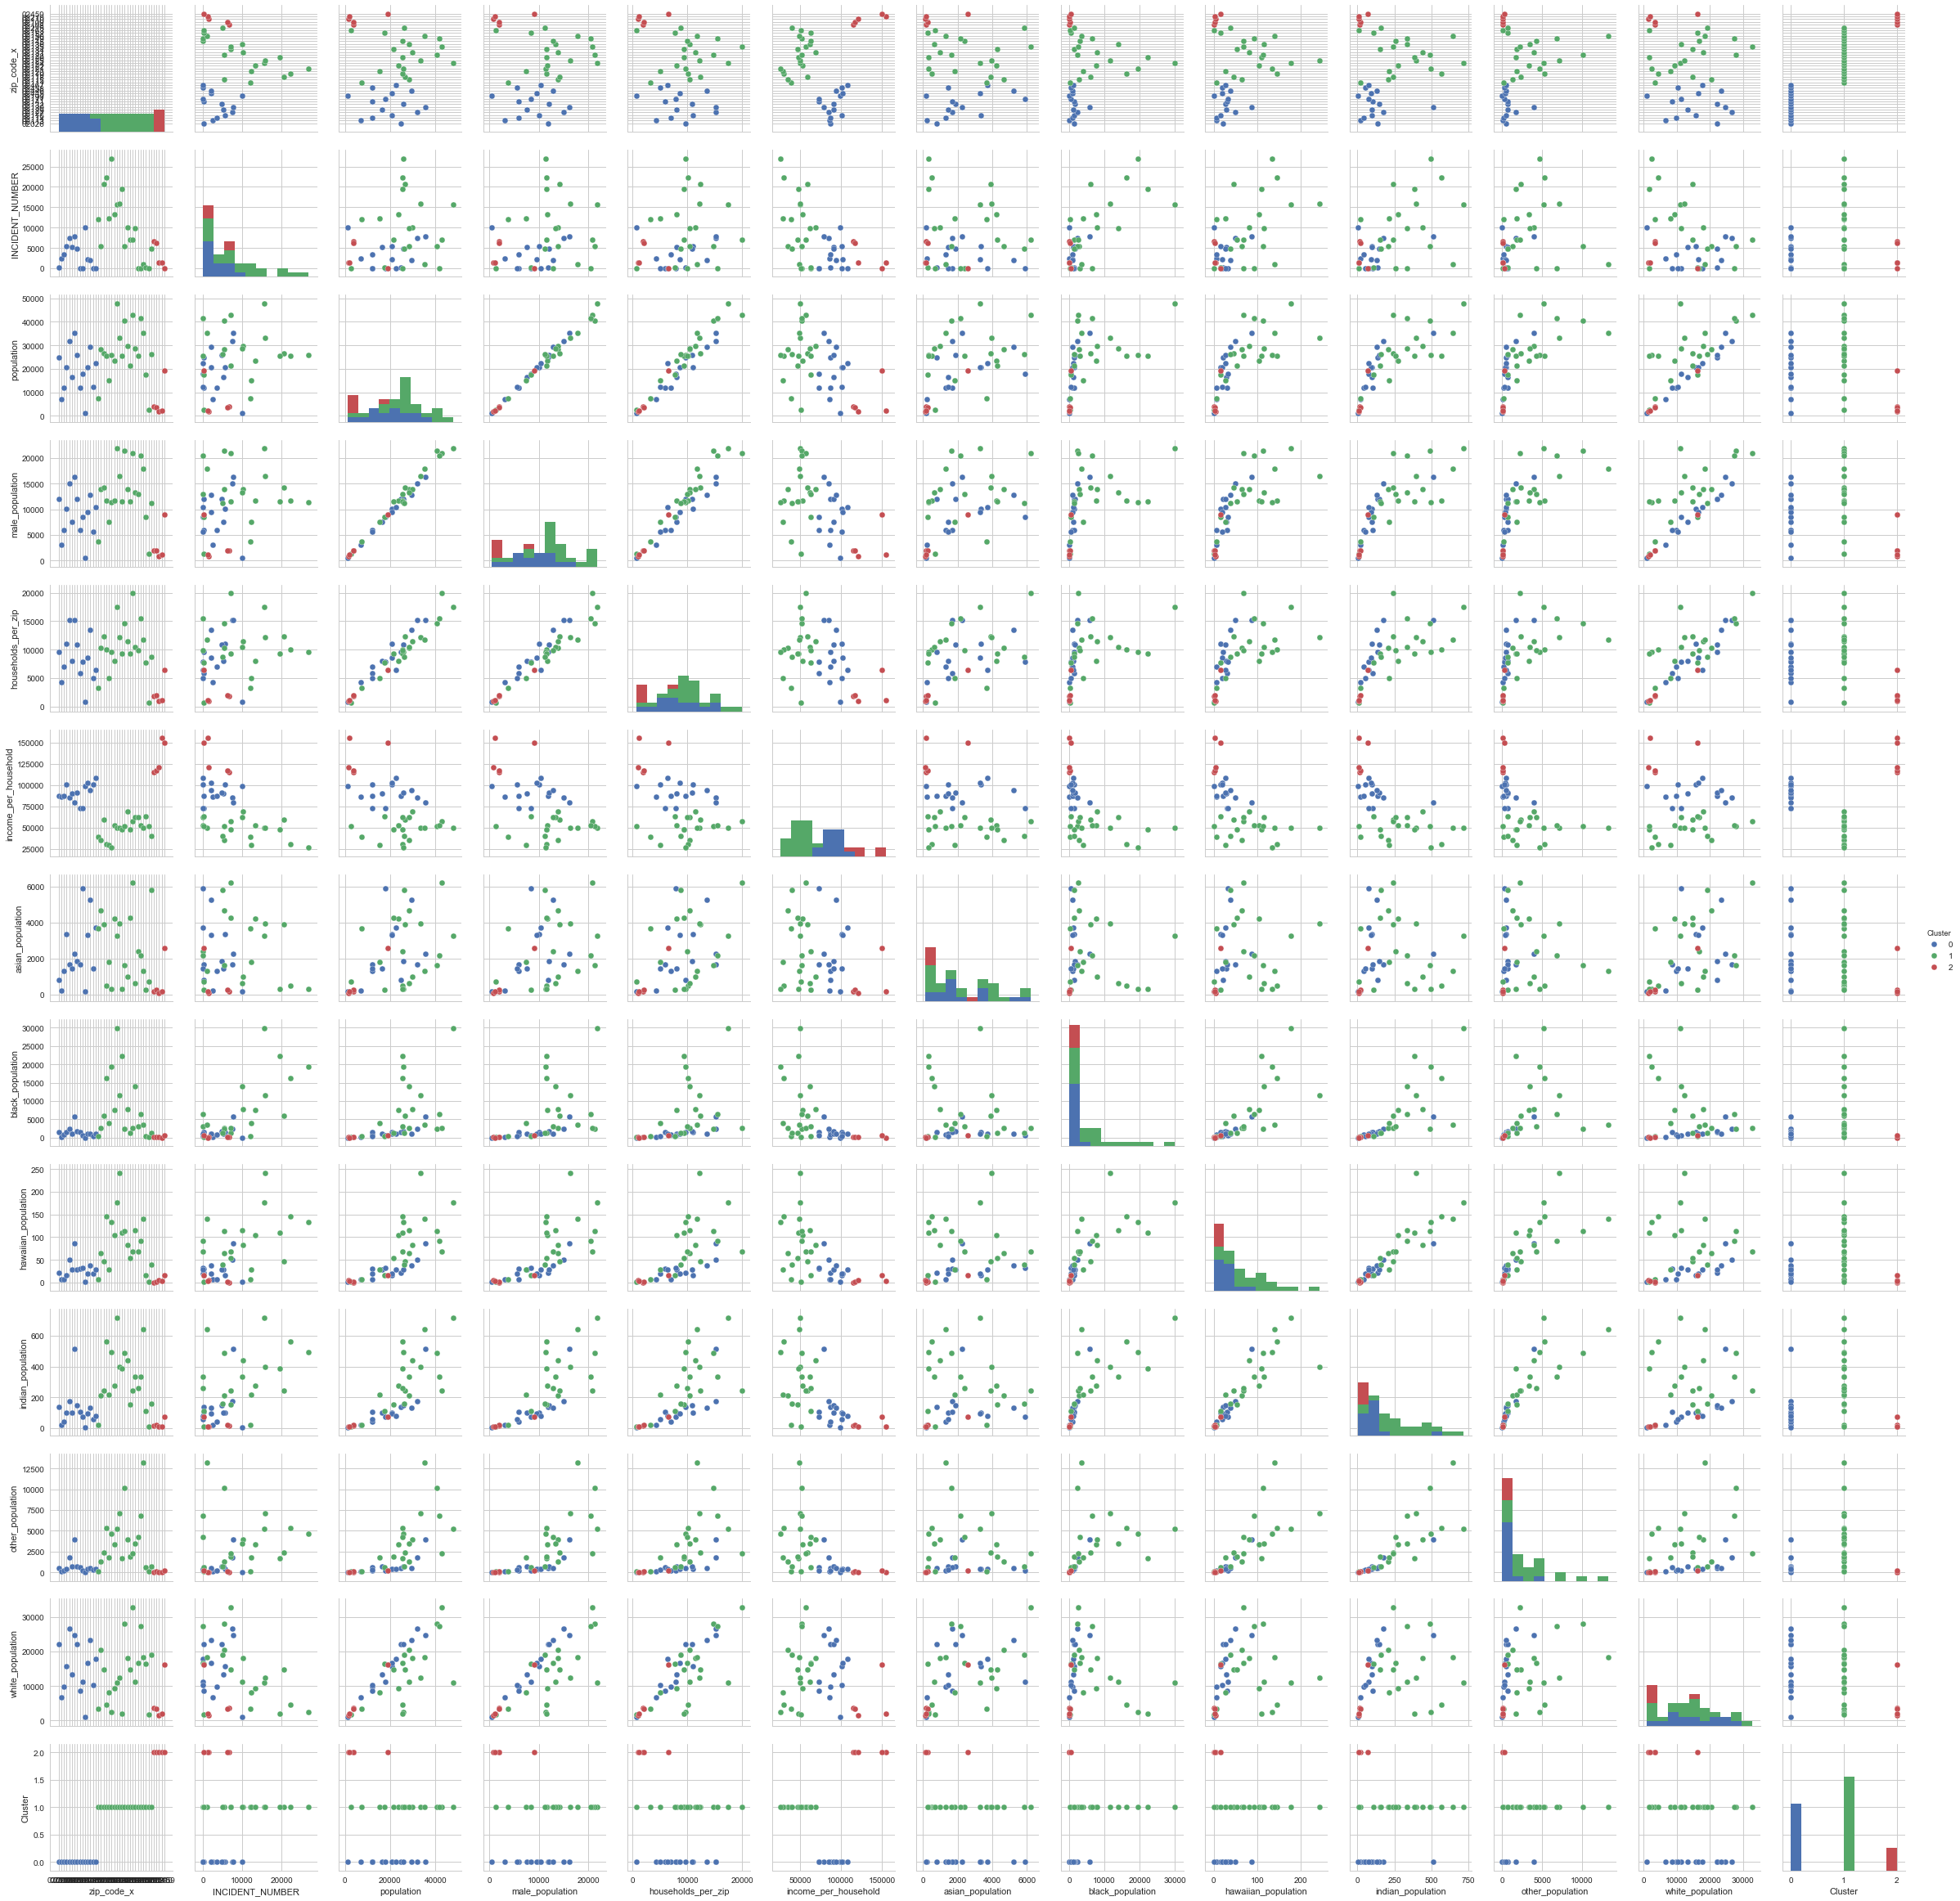

In [47]:
kmeans=KMeans(n_clusters=3).fit(c_data[rel_cols])
data['Cluster']=kmeans.labels_
g = sns.pairplot(data.iloc[:,1:],hue='Cluster')

In [48]:
analysis = data.groupby(by=['Cluster']).agg({'zip_code_x':'count','INCIDENT_NUMBER':np.mean,'population':np.mean,
                                             'hawaiian_population':np.mean,'indian_population':np.mean,
                                             'income_per_household':np.mean,'households_per_zip':np.mean})
analysis.rename(columns={'zip_code_x':'num_of_zip_code','INCIDENT_NUMBER':'num_of_crime_incidence'}, inplace=True)
analysis

,num_of_zip_code,num_of_crime_incidence,population,hawaiian_population,indian_population,income_per_household,households_per_zip
Cluster,,,,,,,
0,15,3409.866667,19275.466667,27.333333,117.400000,90584.200000,8626.533333
1,21,9989.238095,27160.380952,87.857143,319.047619,48981.809524,10387.714286
2,5,3101.400000,6102.800000,5.200000,24.600000,131756.200000,2518.400000


In [49]:
print("List of zip code where the crime incidence is maximum hare the low income and highly populated areas\n", list(data.zip_code_x[data.Cluster==1]))

List of zip code where the crime incidence is maximum hare the low income and highly populated areas
 ['02111', '02115', '02118', '02119', '02120', '02121', '02122', '02124', '02125', '02126', '02128', '02131', '02134', '02135', '02136', '02145', '02149', '02150', '02152', '02163', '02215']


# Ploting the latitudes and longitudes on the map of boston using folium

In [50]:
import os
import folium

print(folium.__version__)

0.5.0


In [51]:
from folium import plugins

In [52]:
count_by_zip = df_crime.groupby(['Lat','Long'])['zip_code'].count()
count_by_zip = count_by_zip.reset_index()
print(type(count_by_zip))

<class 'pandas.core.frame.DataFrame'>


Below cell, plots Boston Heat Map of Crime Incidents, with co-ordinates(latitude,longitude) level granularity.Since the map plots ~18000 unique co-ordinates(latitudes,longitudes), size of the map will approx. be 6 MB and hence will not get displayed in Jupyter notebook. A .html file of one run is attached in zip file.Also once the below cell is executed, boston_crime_heatmap.html file gets saved in the current working directory.

In [53]:
#%%time
import numpy as np

data = np.array(
    [
        count_by_zip['Lat'],
        count_by_zip['Long'],
        #count_by_zip['zip_code'],
    ]
).T

heatmap = folium.Map([42.36, -71.31], zoom_start=4) #latitude-longitude co-ordinates of Boston
heatmap.add_child(plugins.HeatMap([[row["Lat"], row["Long"]] for name, row in df_crime.iloc[:17997].iterrows()])) #Unique co-ordinates
plugins.MarkerCluster(data).add_to(heatmap)
heatmap.save("heatmap.html")


In [58]:
end_time = time.time()
print("Total run time:",(end_time - start_time))

Total run time: 176.74422574043274


# Profiling the regression by artificially increasing the dataset size

The df_crime data is multiplied by 2,3,4 and so till 9 in every iteration

In [59]:
initial_dataset = df_crime

data_size_multiplier = [1, 2, 3, 4, 5, 6, 7, 8]
time_taken = []

for num, size in enumerate(data_size_multiplier):
    dataset = initial_dataset.append([initial_dataset]*size,ignore_index=True)
    initial_dataset = df_crime
    print("========================================================")
    %memit
    print("DATASET SIZE: {:,}".format(dataset.shape[0]))
    t_1 = time.time()
    grouped_vars = dataset.groupby(['zip_code', 'HOUR', 'DAY_OF_WEEK'])    
    grouped_stats = grouped_vars.agg({'zip_code':'count'})
    grouped_stats.rename(columns={'zip_code':'num_of_crime_incidents'}, inplace=True)
    grouped_stats= grouped_stats.reset_index()
    
    res_1 = smf.ols(formula='num_of_crime_incidents ~ C(DAY_OF_WEEK) + C(HOUR) + C(zip_code)', data=grouped_stats).fit()
    t_2 = time.time()
    time_taken.append(t_2-t_1)
    print("TIME TAKEN: {}".format(t_2 - t_1), end='\n\n')

data_size_labels = [x+1 for x in data_size_multiplier]

peak memory: 1361.05 MiB, increment: 0.03 MiB
DATASET SIZE: 567,742
TIME TAKEN: 1.1695539951324463

peak memory: 1626.62 MiB, increment: -18.32 MiB
DATASET SIZE: 851,613
TIME TAKEN: 1.5395009517669678

peak memory: 1687.41 MiB, increment: -5.21 MiB
DATASET SIZE: 1,135,484
TIME TAKEN: 2.2986509799957275

peak memory: 1675.50 MiB, increment: 0.05 MiB
DATASET SIZE: 1,419,355
TIME TAKEN: 2.6479949951171875

peak memory: 1859.27 MiB, increment: 0.04 MiB
DATASET SIZE: 1,703,226
TIME TAKEN: 3.1960830688476562

peak memory: 1959.91 MiB, increment: 0.06 MiB
DATASET SIZE: 1,987,097
TIME TAKEN: 3.7822296619415283

peak memory: 2131.64 MiB, increment: 0.05 MiB
DATASET SIZE: 2,270,968
TIME TAKEN: 4.412623167037964

peak memory: 2131.14 MiB, increment: 0.05 MiB
DATASET SIZE: 2,554,839
TIME TAKEN: 4.836266994476318



### Time taken to run increases linearly with increase in the original datasize (original size = ~300k)

In [ ]:
fig, ax = plt.subplots()

plt.title('Time to run the regression vs Datasize multiplier', fontsize=16)
plt.ylabel('Time in seconds', fontsize=15)
plt.xlabel('X TIMES Original Datasize', fontsize=15)
ax.plot(data_size_labels, time_taken)

# Profiling of clustering algorithm and ploting the pairplot with increasing zip codes

The dataset is multiplied by 4 in every iteration to analyse the time taken to perform clustering algorithm and plotting the pairplots between given attributes. We see an increase in time with an almost linear relationship when the number of zip codes approaches 41,000 which is equal to the total number of zip codes in US.

Hence, if this algorithm is run for the complete US data over given attributes, it will take just 34 seconds run time.

peak memory: 1538.96 MiB, increment: 0.11 MiB
DATASET SIZE: 164
TIME TAKEN: 10.997316122055054

peak memory: 1594.65 MiB, increment: 0.00 MiB
DATASET SIZE: 656
TIME TAKEN: 10.984687089920044

peak memory: 1547.79 MiB, increment: 0.00 MiB
DATASET SIZE: 2,624
TIME TAKEN: 13.241466283798218

peak memory: 1648.18 MiB, increment: 0.03 MiB
DATASET SIZE: 10,496
TIME TAKEN: 17.110450983047485

peak memory: 1735.38 MiB, increment: -10.25 MiB
DATASET SIZE: 41,984
TIME TAKEN: 34.39664578437805



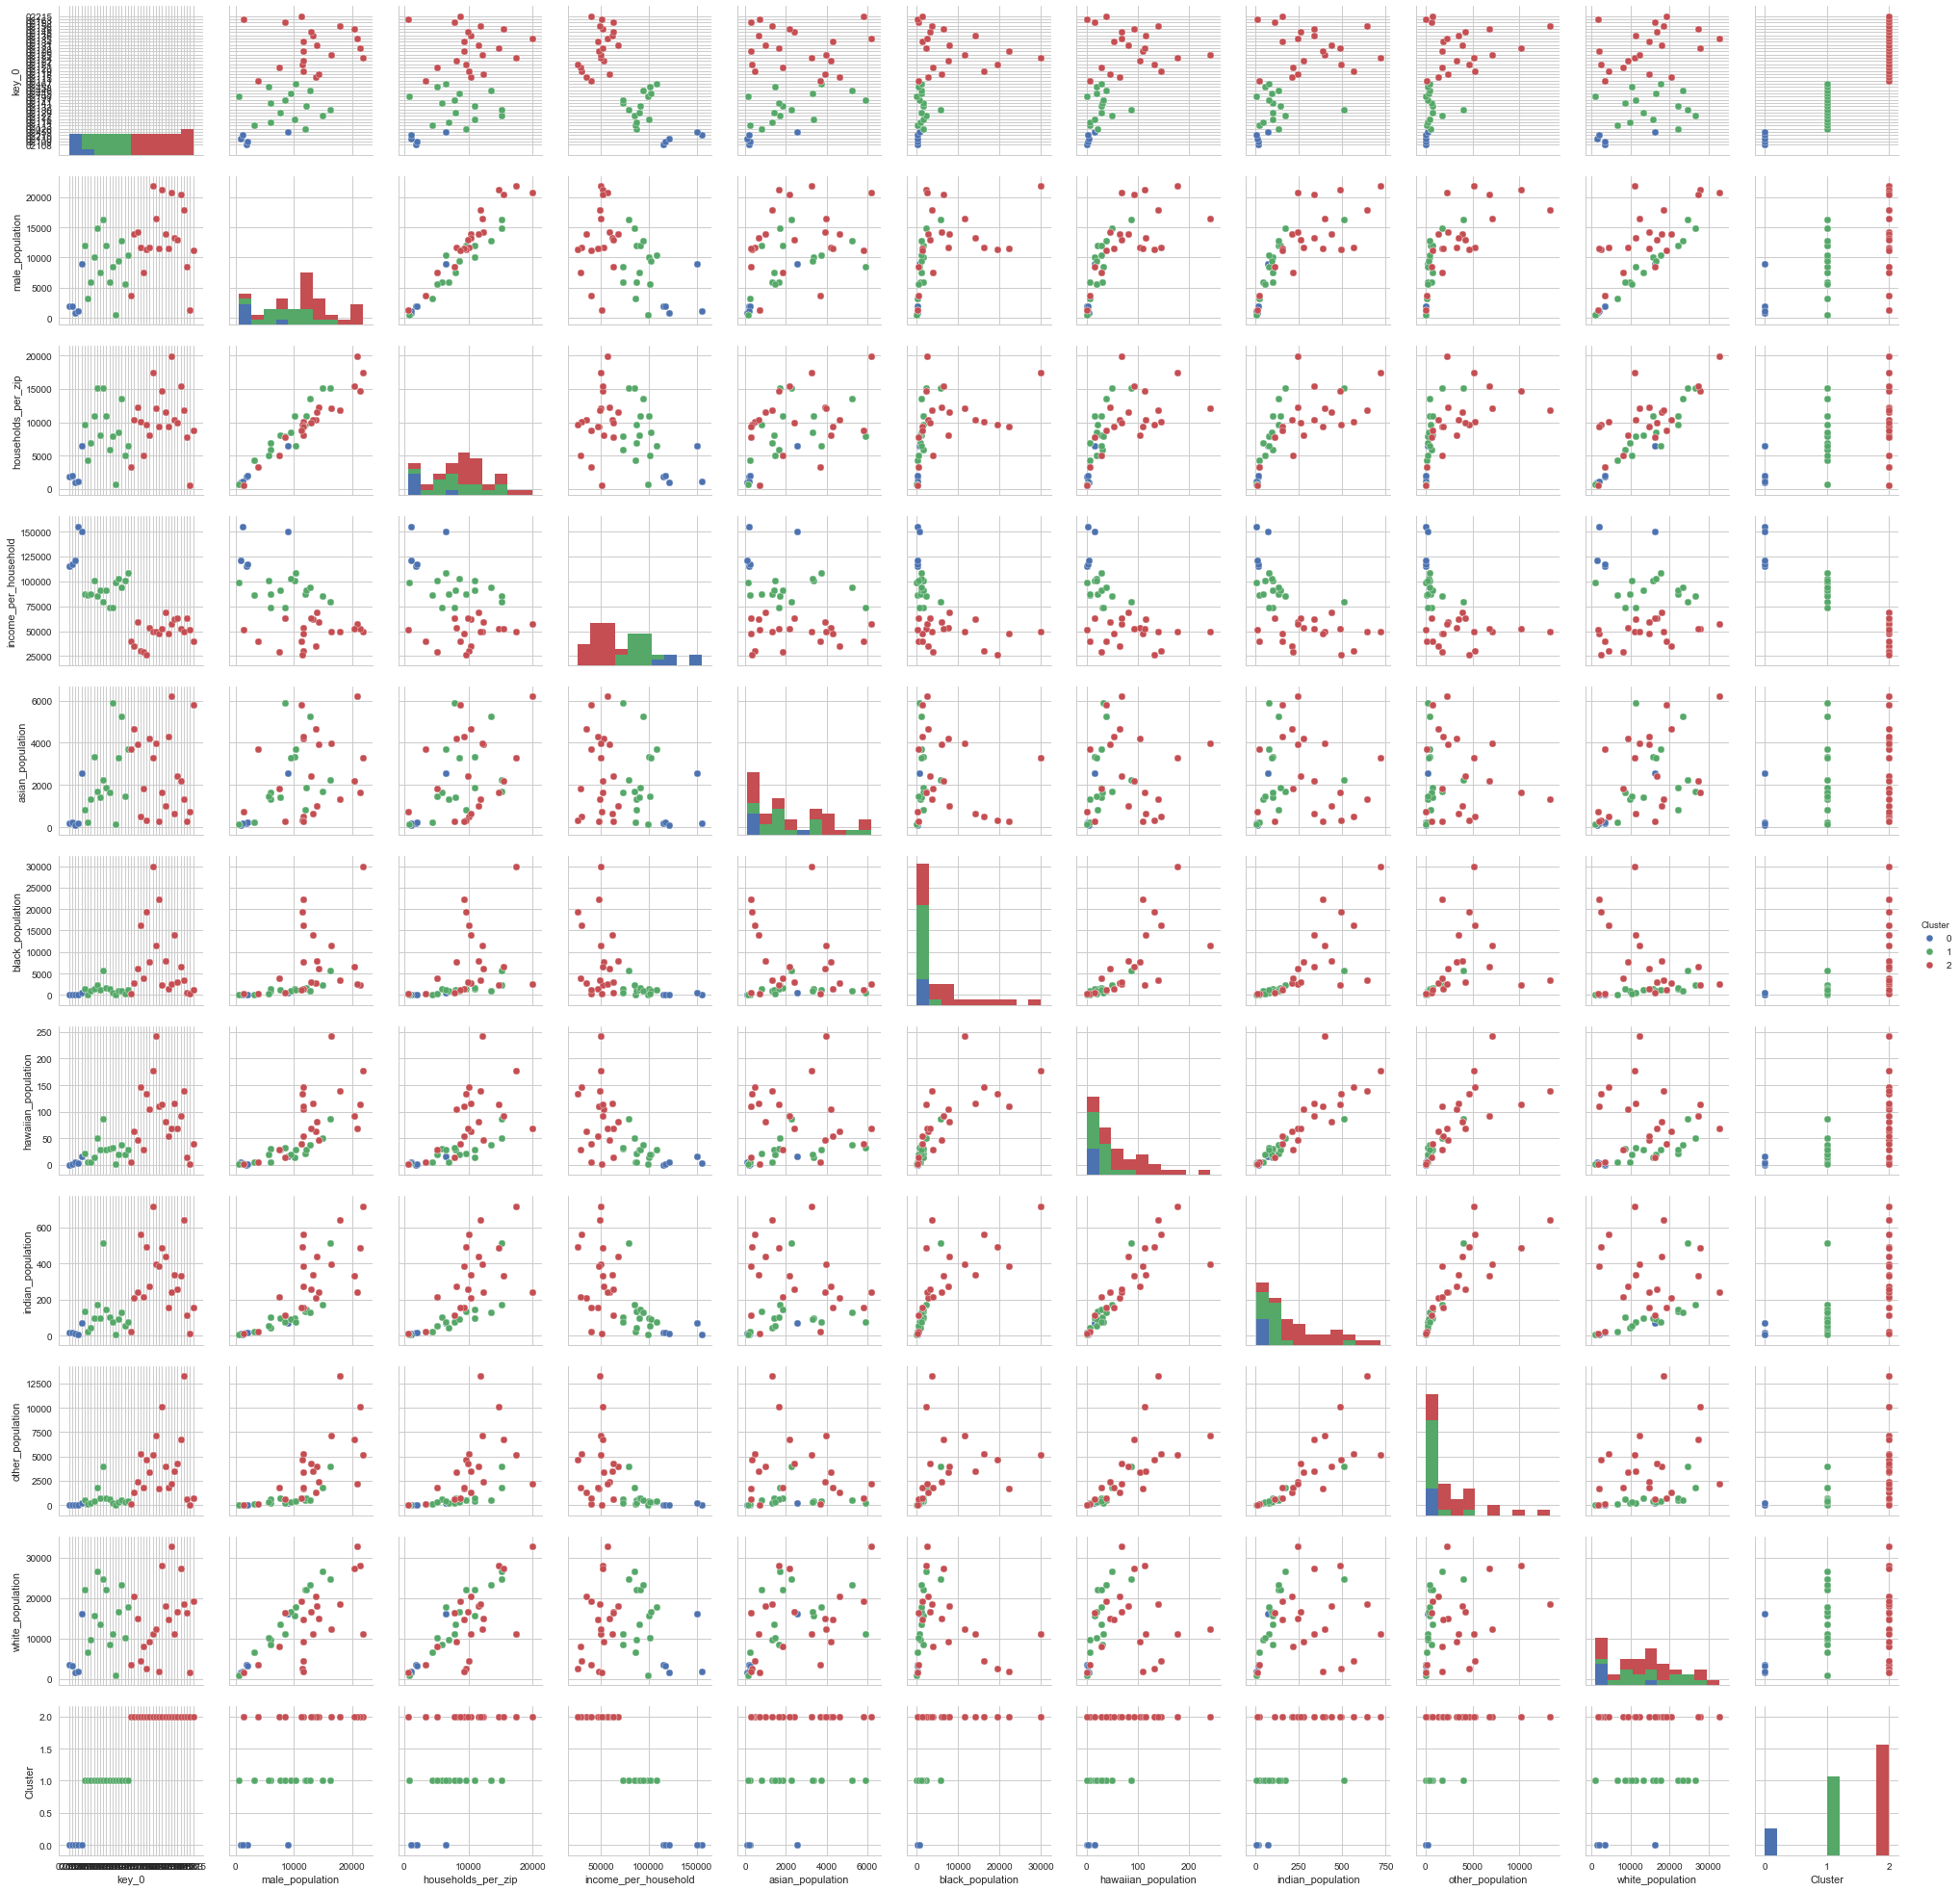

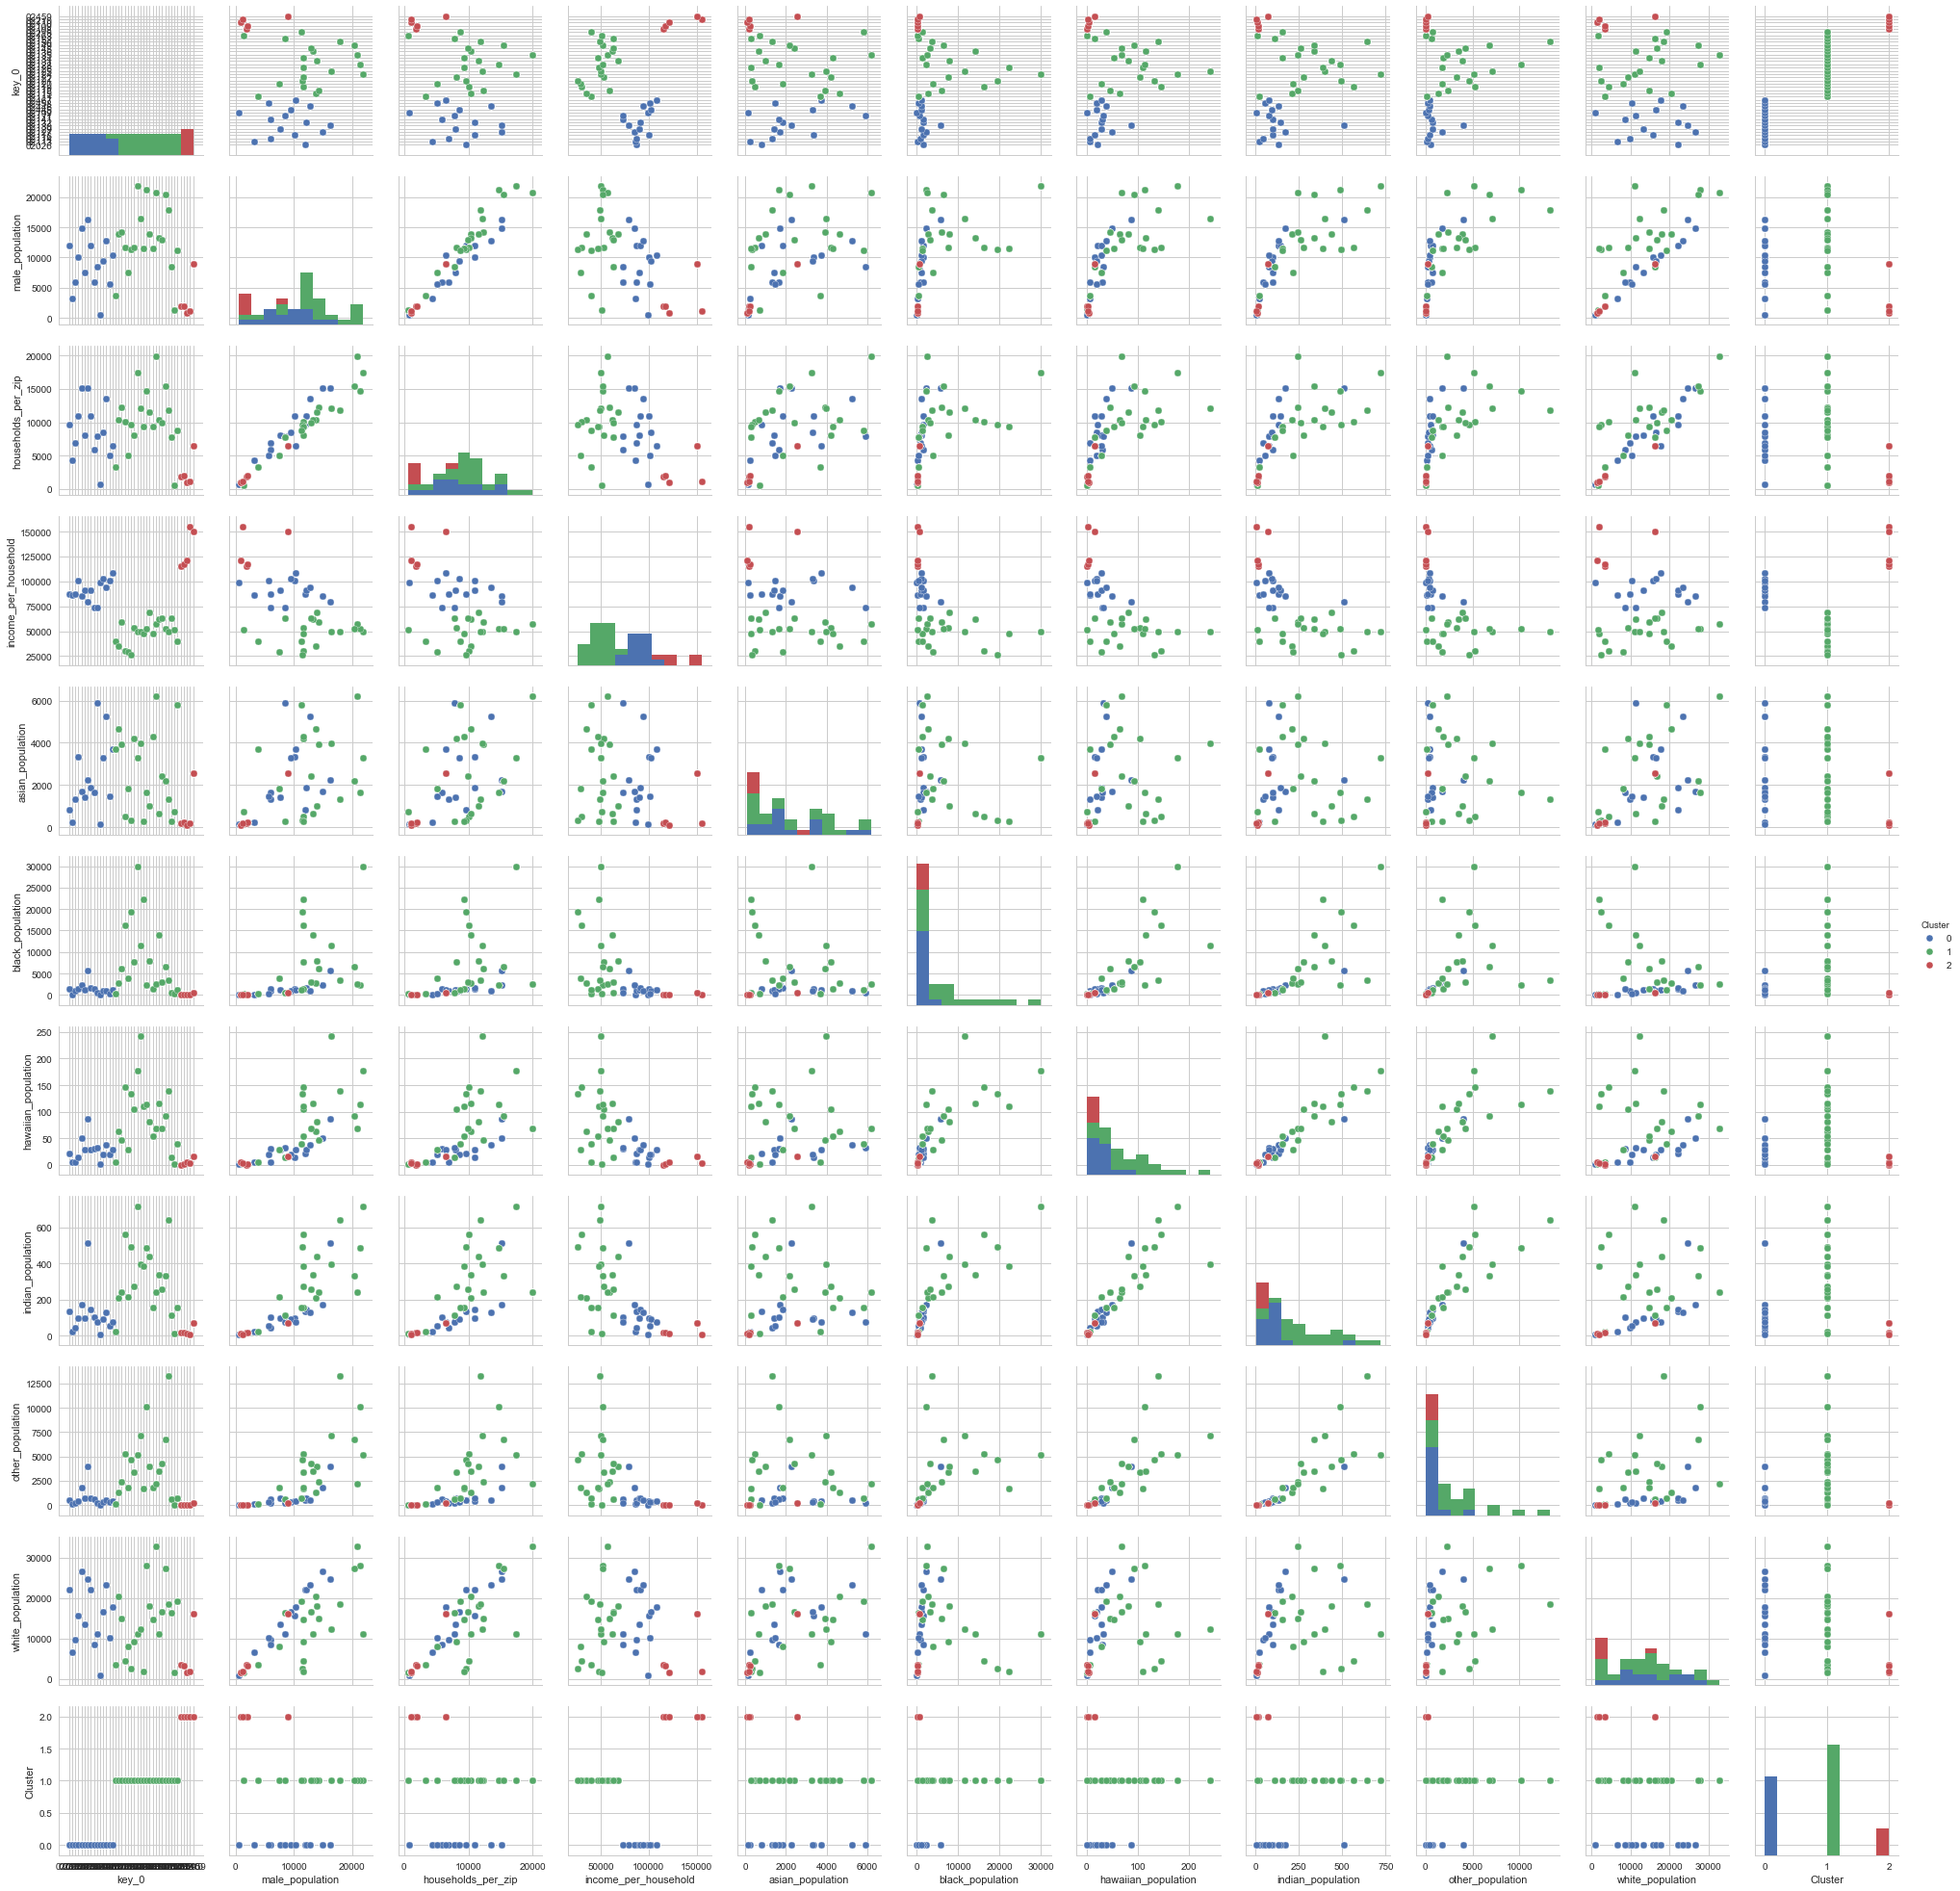

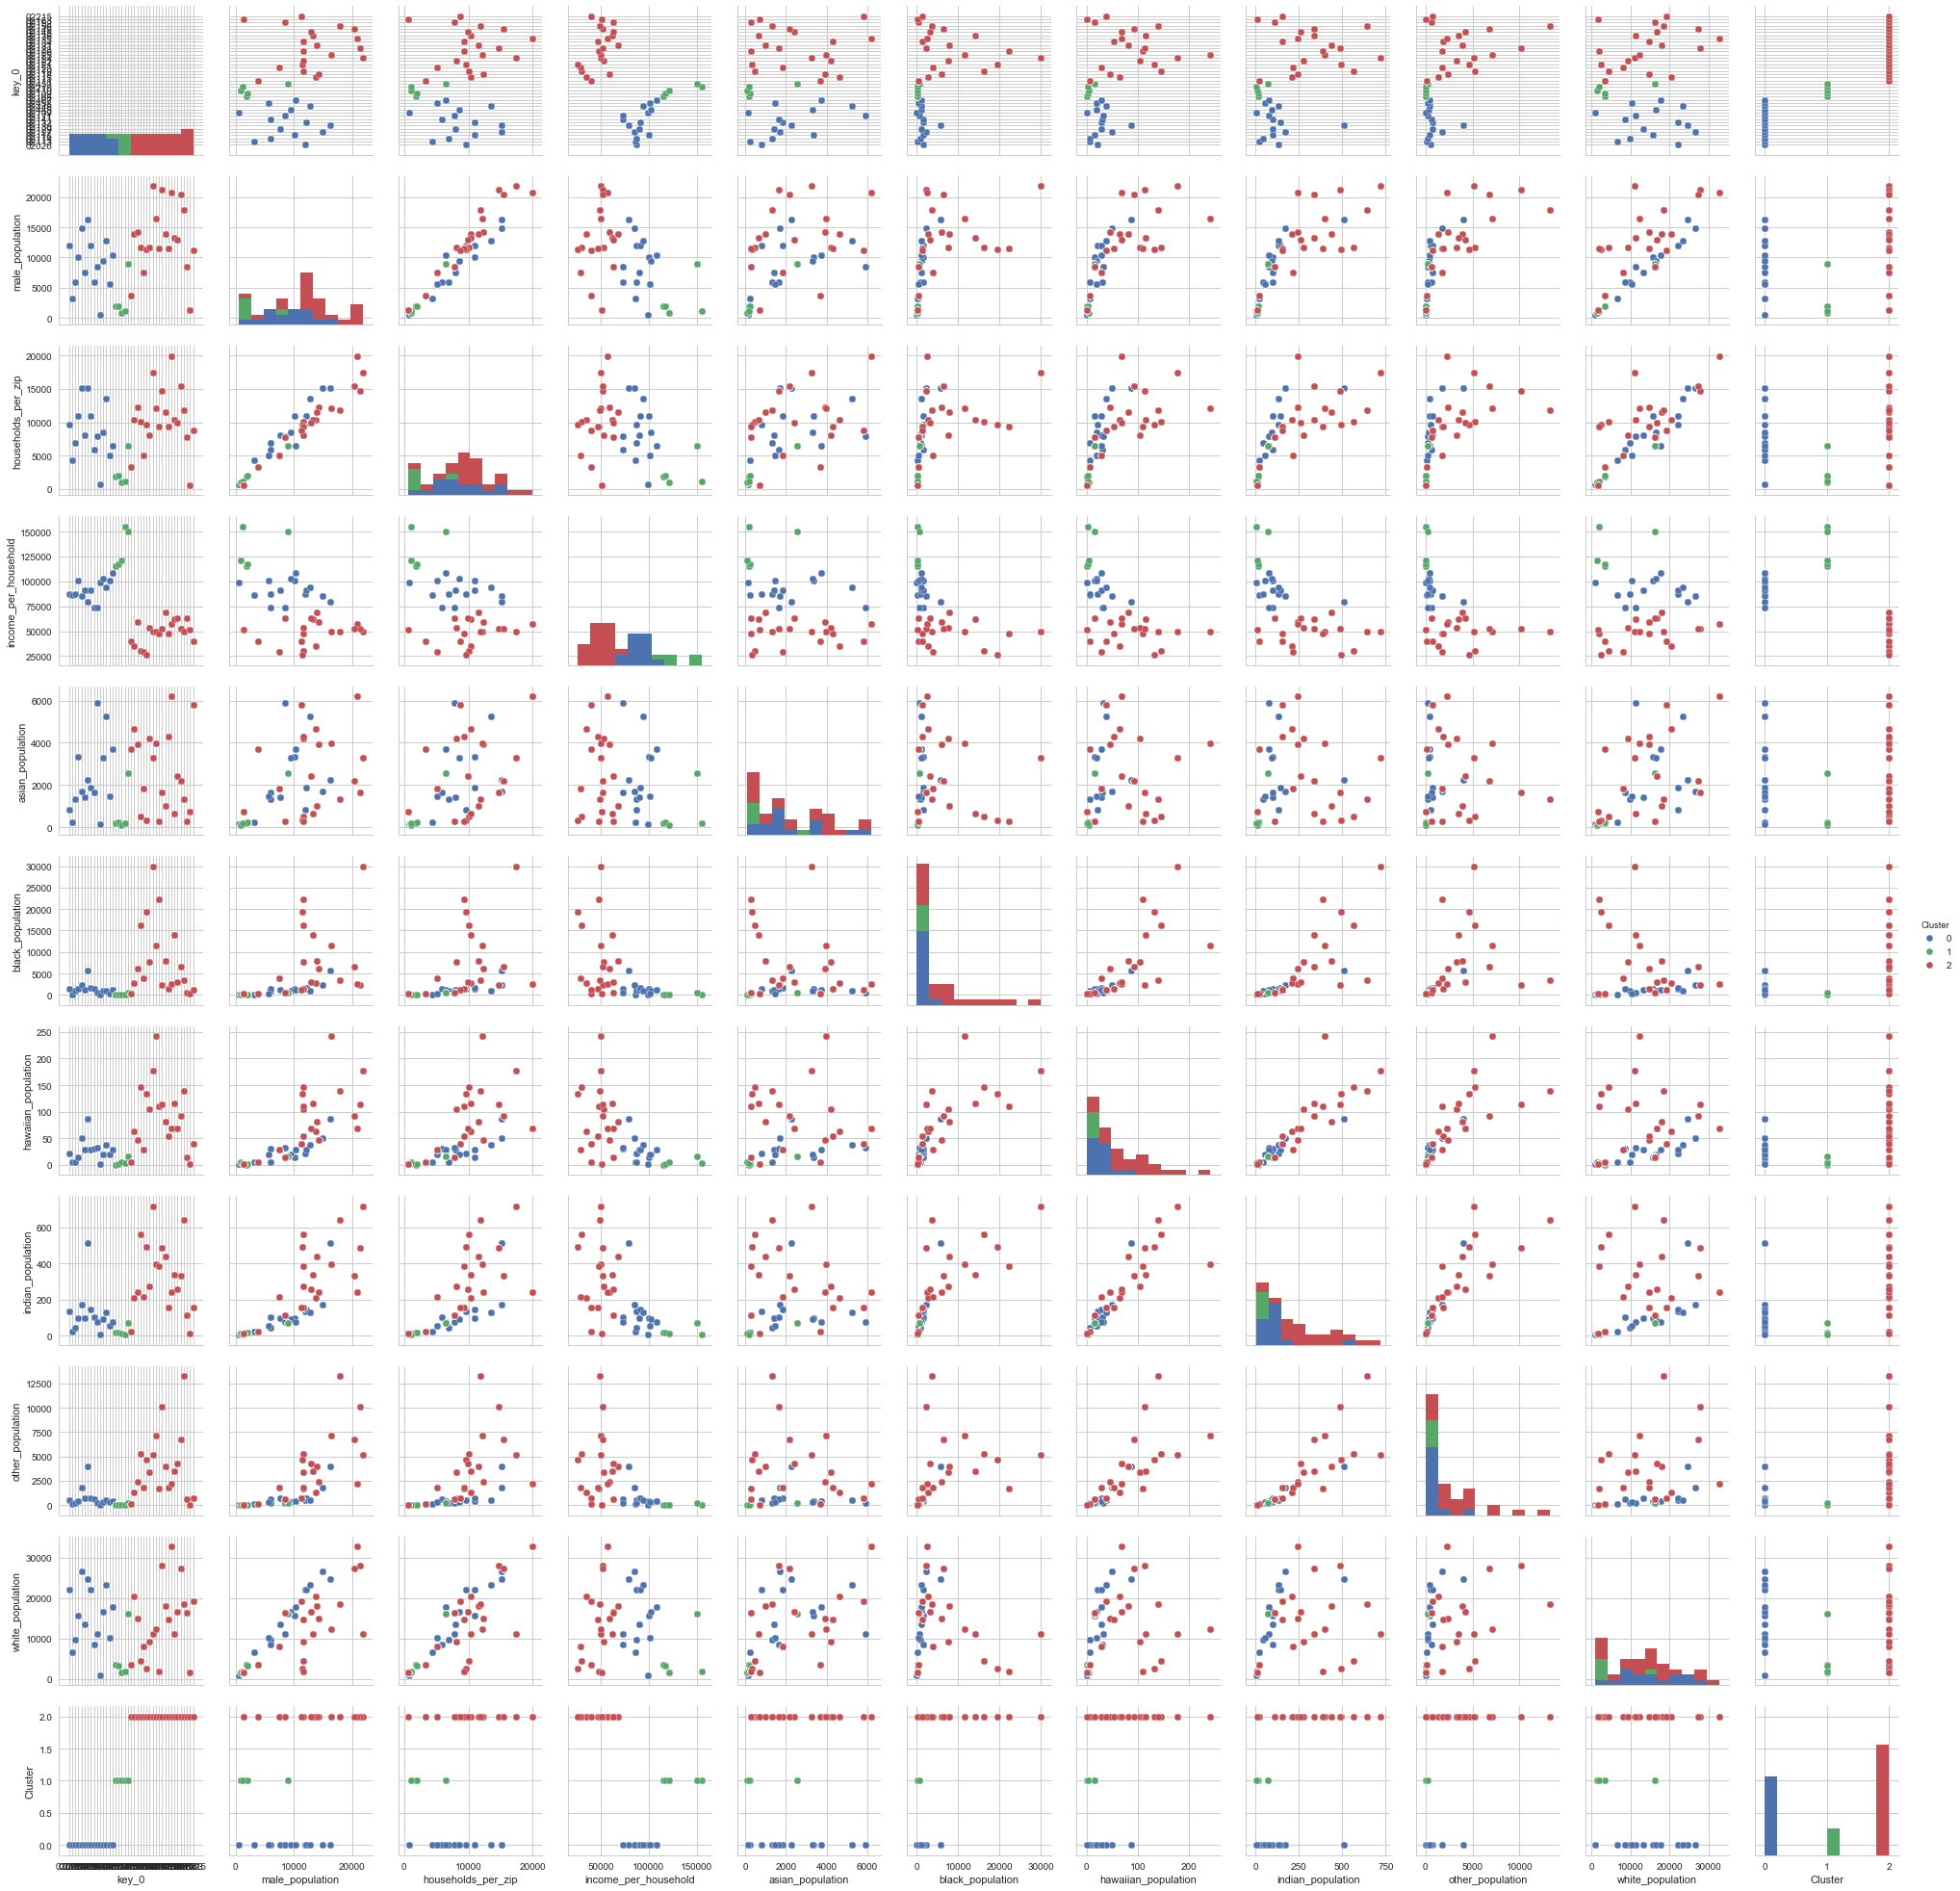

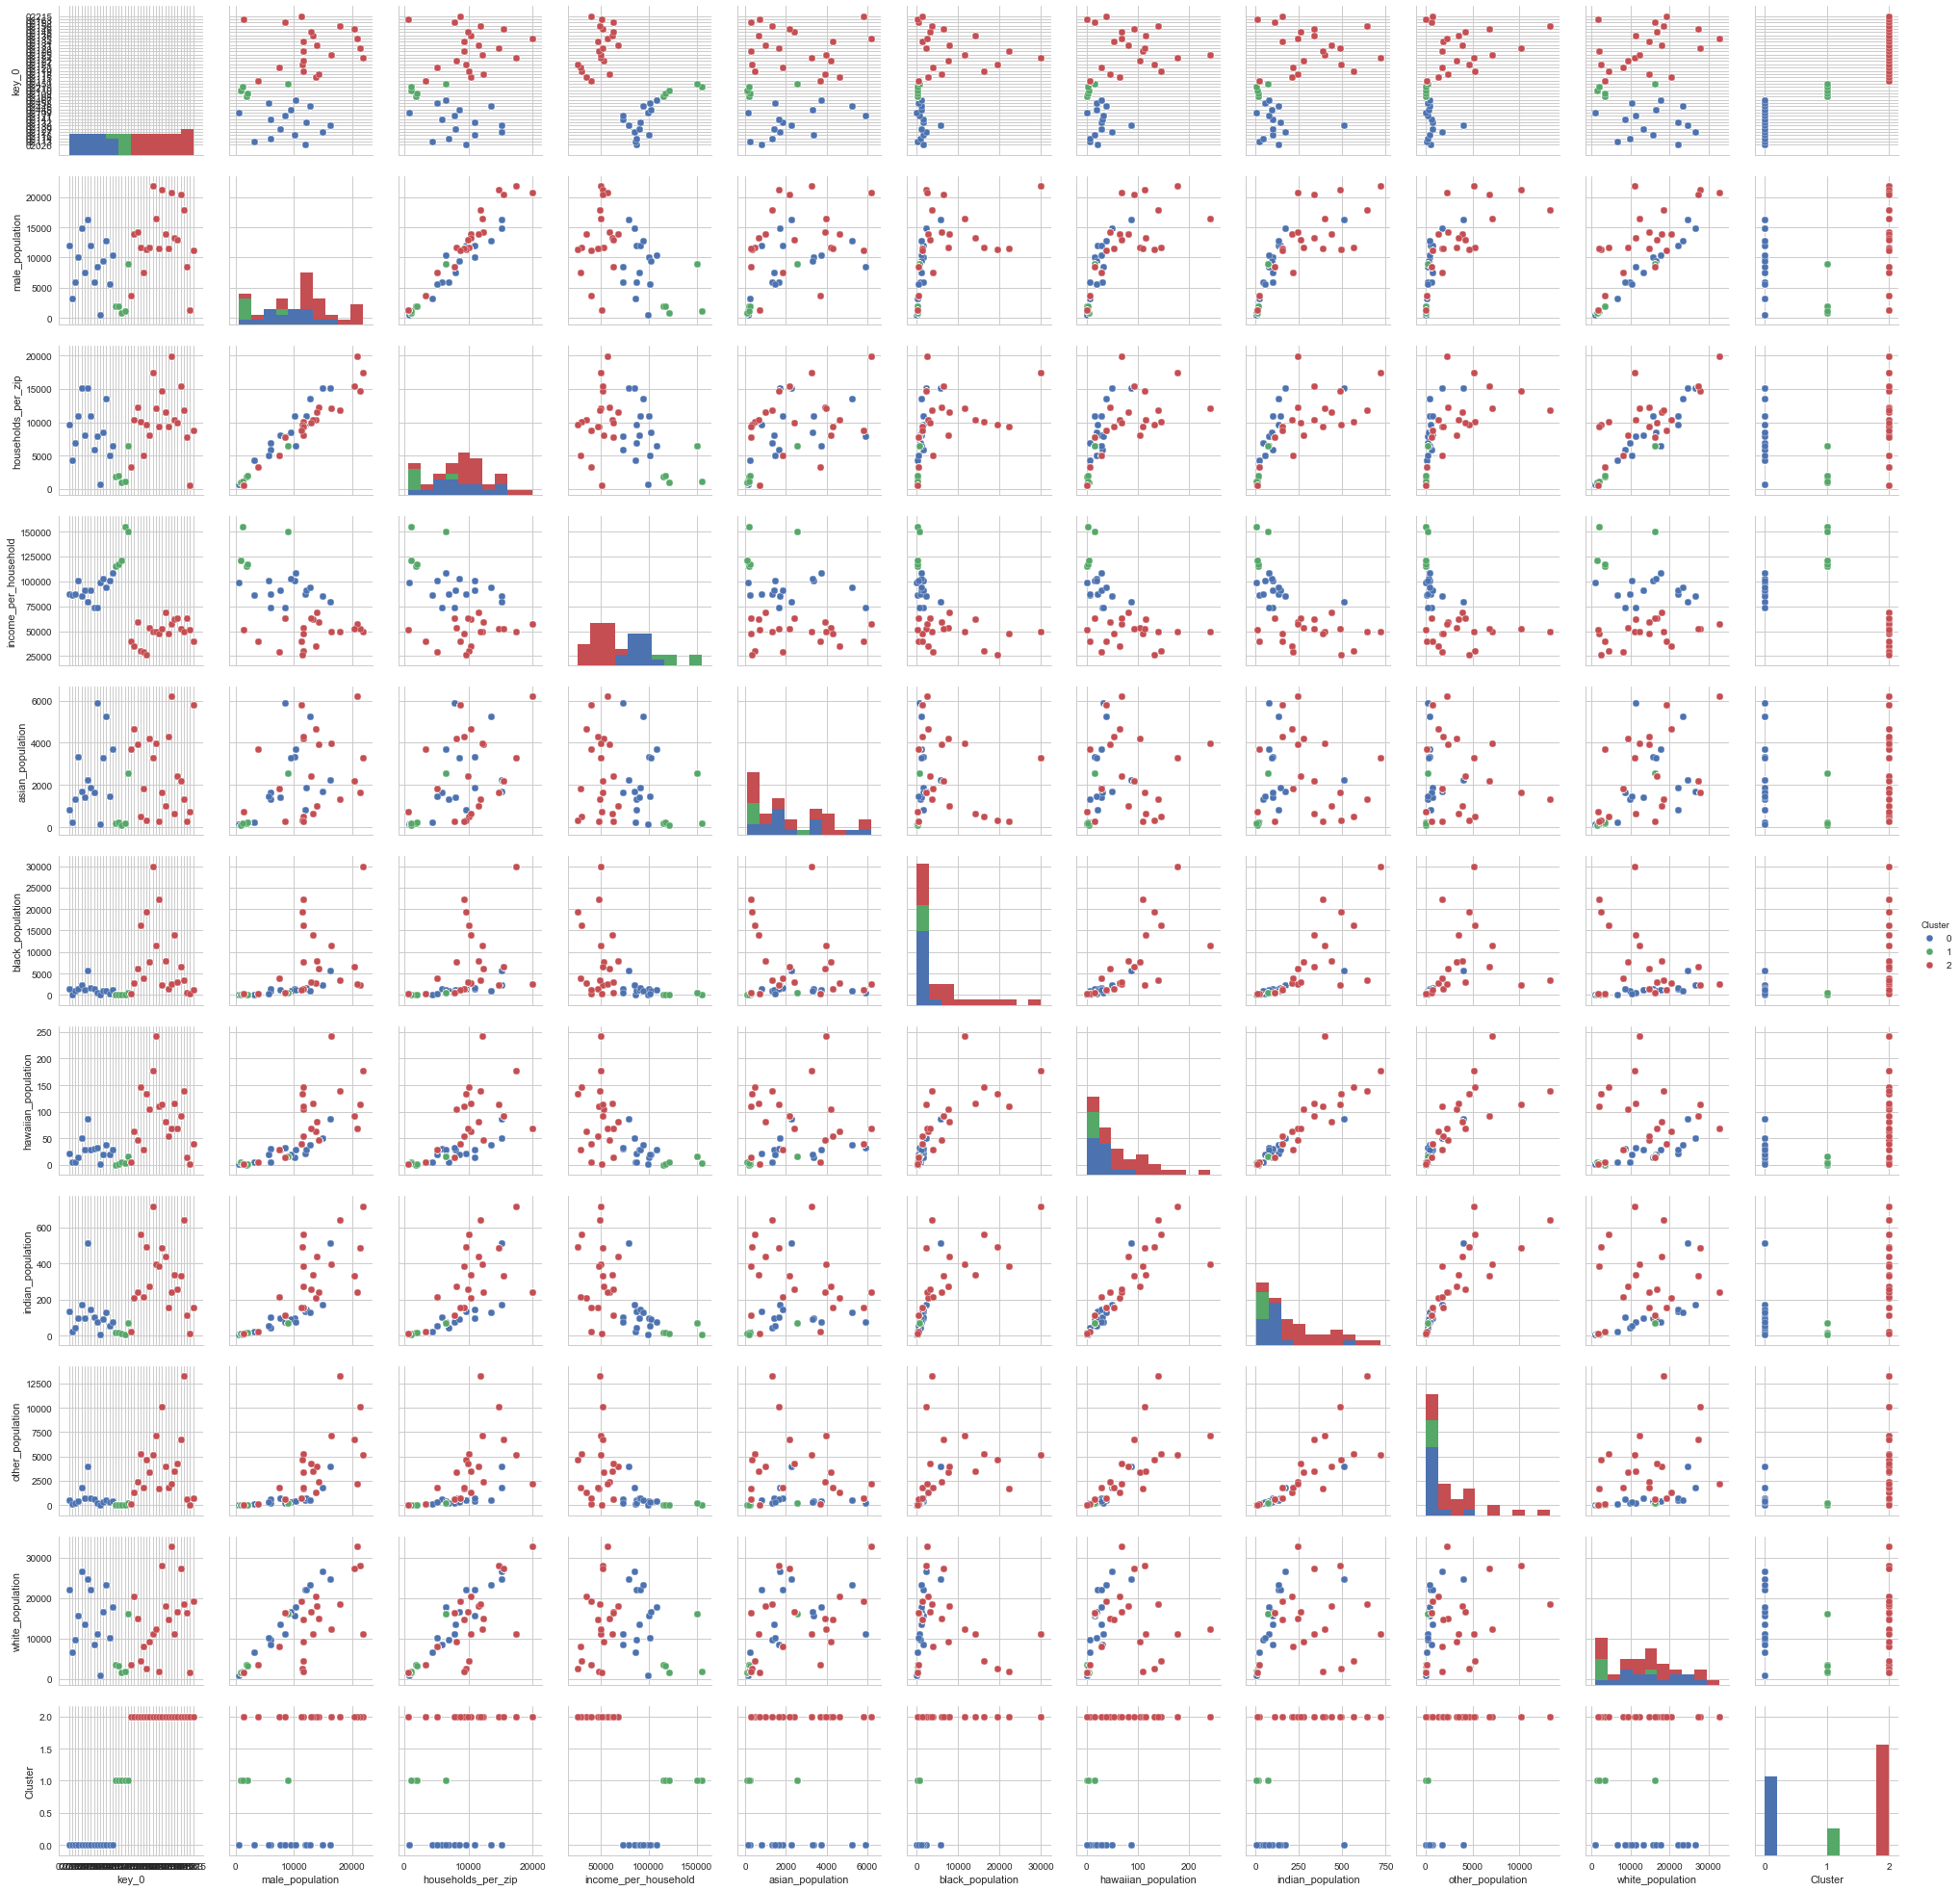

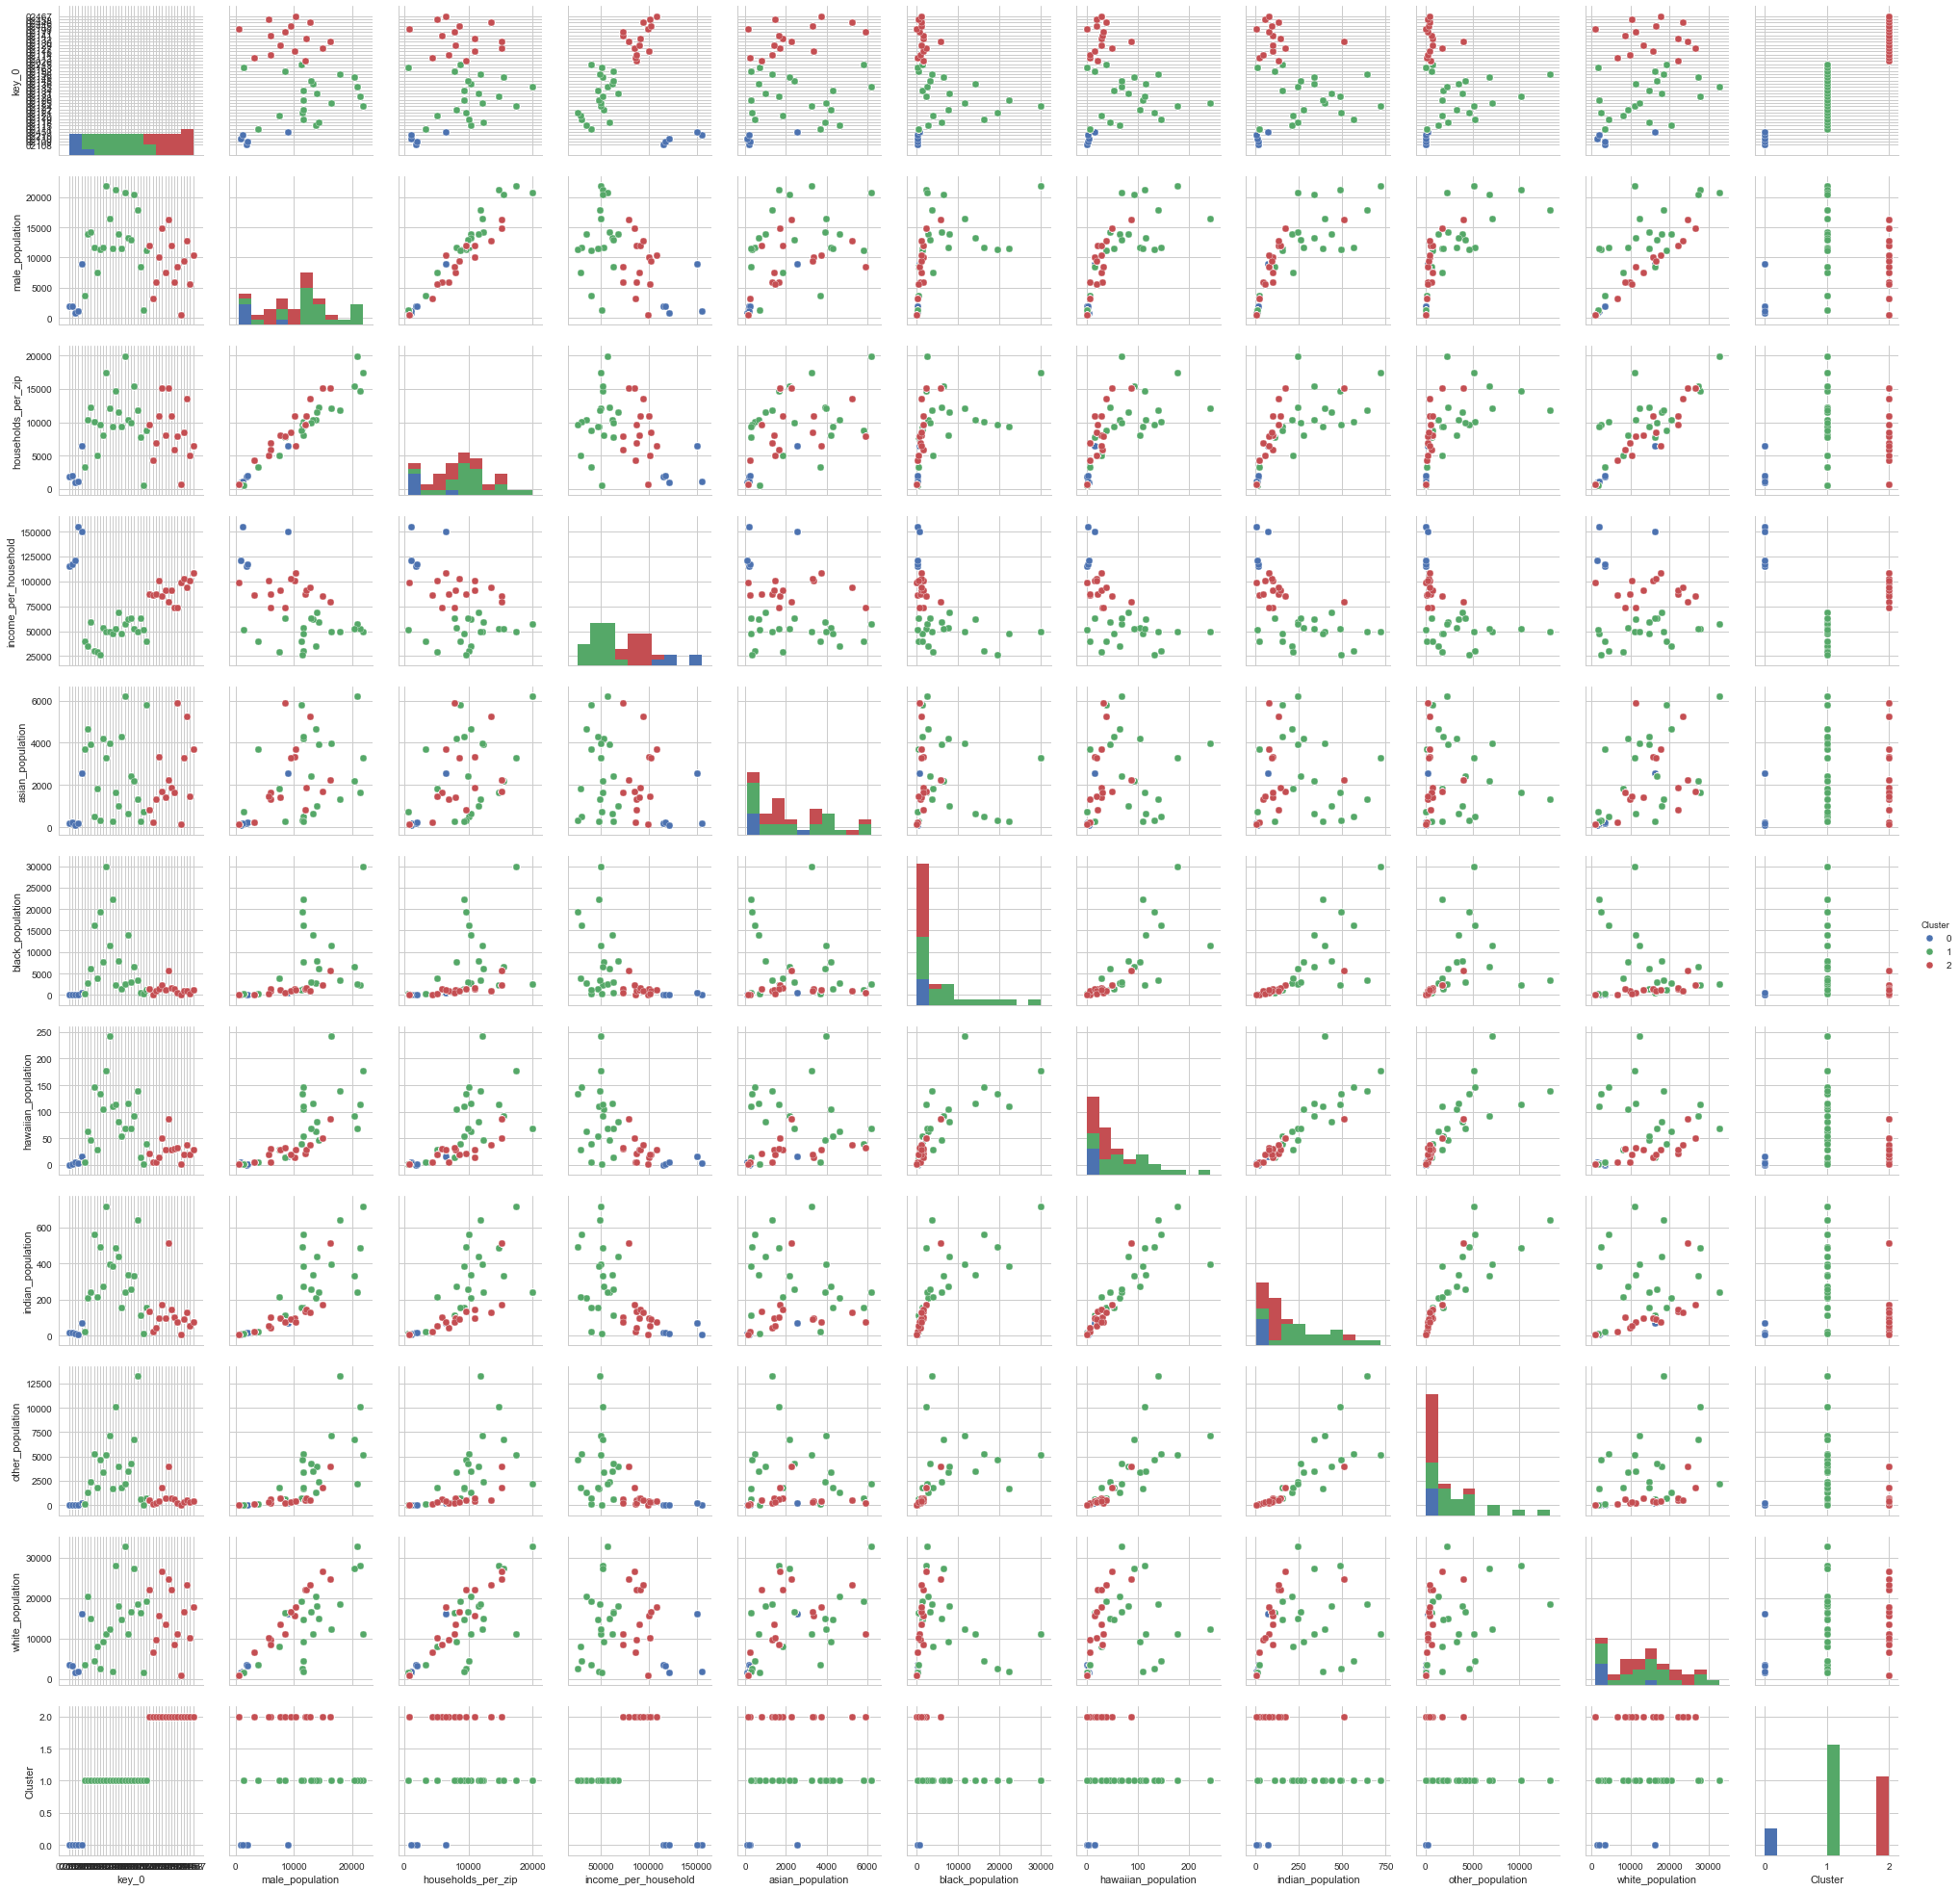

In [60]:
initial_dataset = c_data

data_size_multiplier = [3,3,3,3,3]
time_taken = []

for num, size in enumerate(data_size_multiplier):
    print("========================================================")
    %memit
    dataset = initial_dataset.append([initial_dataset]*size,ignore_index=True)
    initial_dataset = dataset
    print("DATASET SIZE: {:,}".format(dataset.shape[0]))
    t_1 = time.time()
    kmeans=KMeans(n_clusters=3).fit(dataset[rel_cols])
    dataset['Cluster'] = kmeans.labels_
    g = sns.pairplot(dataset,hue='Cluster')
    t_2 = time.time()
    time_taken.append(t_2-t_1)
    print("TIME TAKEN: {}".format(t_2 - t_1), end='\n\n')

data_size_labels = [4,16,64,256,1024]

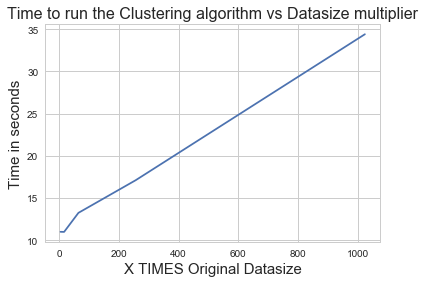

In [61]:
fig, ax = plt.subplots()

plt.title('Time to run the Clustering algorithm vs Datasize multiplier', fontsize=16)
plt.ylabel('Time in seconds', fontsize=15)
plt.xlabel('X TIMES Original Datasize', fontsize=15)
ax.plot(data_size_labels, time_taken)